In [144]:
# Chargement des librairies nécessaires
import os, sys, time, csv
from ast import literal_eval
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt 
import seaborn as sns

# Importer beautiful soup
from bs4 import BeautifulSoup as bs

# Remplacement de character
import re

# NLP
import nltk
from nltk.stem import WordNetLemmatizer, PorterStemmer
from nltk.tokenize import word_tokenize, wordpunct_tokenize, RegexpTokenizer
from nltk.corpus import words, stopwords

#visualisation
from wordcloud import WordCloud
from PIL import Image
import pyLDAvis
import pyLDAvis.gensim
import pyLDAvis.lda_model

# Gensim
import gensim
import gensim.corpora as corpora
from gensim.models import CoherenceModel


# Import LDA
from sklearn.decomposition import LatentDirichletAllocation
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer

from collections import Counter

# label 
from sklearn.preprocessing import MultiLabelBinarizer

# model 
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.linear_model import LogisticRegression, SGDClassifier 

# Metrics
from sklearn.metrics import jaccard_score

# Classifier 
from sklearn.multiclass import OneVsRestClassifier

# Tensorflow
import tensorflow as tf
import tensorflow.keras
from tensorflow.keras import backend as K

from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras import metrics as kmetrics
from tensorflow.keras.layers import *
from tensorflow.keras.models import Model

In [3]:
nltk.download('punkt')
nltk.download('wordnet')
nltk.download('omw-1.4')
nltk.download('words')

[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\aguer\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\aguer\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package omw-1.4 to
[nltk_data]     C:\Users\aguer\AppData\Roaming\nltk_data...
[nltk_data]   Package omw-1.4 is already up-to-date!
[nltk_data] Downloading package words to
[nltk_data]     C:\Users\aguer\AppData\Roaming\nltk_data...
[nltk_data]   Package words is already up-to-date!


True

In [ ]:
'''
SELECT TOP 50000 Title, Body, Tags, Id, Score, FavoriteCount, AnswerCount  
FROM Posts
WHERE PostTypeId = 1 
AND ViewCount > 10 
AND Score > 5 
AND AnswerCount > 0 
AND LEN(Tags) - LEN(REPLACE(Tags, '<','')) >= 5 
AND Id NOT IN (SELECT TOP 150000 Id FROM Posts WHERE PostTypeId = 1 AND ViewCount > 10 AND Score > 5 AND AnswerCount > 0 AND LEN(Tags) - LEN(REPLACE(Tags, '<','')) >= 5 ORDER BY Id) 
ORDER BY Id
'''

In [310]:
data = "./data/source/"
os.listdir(data)

['.ipynb_checkpoints',
 'QueryResults_1.csv',
 'QueryResults_2.csv',
 'QueryResults_3.csv',
 'QueryResults_4.csv']

In [311]:
dataset1 = data + "QueryResults_1.csv"
dataset2 = data + "QueryResults_2.csv"
dataset3 = data + "QueryResults_3.csv"
dataset4 = data + "QueryResults_4.csv"

In [312]:
# Chargement des datasets
data1 = pd.read_csv(dataset1)
data2 = pd.read_csv(dataset2)
data3 = pd.read_csv(dataset3)
data4 = pd.read_csv(dataset4)

In [313]:
# Merger les résultats
merge = [data1, data2, data3, data4]
data = pd.concat(merge, ignore_index=True)

In [1]:
# Visualisation
data.head()

NameError: name 'data' is not defined

In [167]:
data.tail()

,Title,Body,Tags,Id,Score,FavoriteCount,AnswerCount
199995,Ionic 4 horizontal scroll with ngFor,<p>I'm at a loss. I can get horizontal scroll...,<css><angular><ionic-framework><ngfor><ionic4>,54413418,7,NaN,3
199996,Type hinting with descriptors,"<p>In <a href=""https://github.com/python/mypy/...",<python><python-3.x><type-hinting><mypy><pytho...,54413434,12,0.0,3
199997,How to add multiple lines between code blocks ...,"<p>I started using Prettier, but discovered th...",<javascript><node.js><typescript><visual-studi...,54413716,7,0.0,1
199998,React-Select Scrollbar Styling,<p>I am trying to change the style of scrollba...,<reactjs><frontend><scrollbar><styling><react-...,54413762,7,0.0,2
199999,Convert sklearn.svm SVC classifier to Keras im...,<p>I'm trying to convert some old code from us...,<machine-learning><keras><scikit-learn><neural...,54414392,19,0.0,3


In [168]:
data.sample(20)

,Title,Body,Tags,Id,Score,FavoriteCount,AnswerCount
41013,How use Eclipse as a Javascript IDE?,<p>I downloaded the eclipse Javascript IDE fro...,<javascript><eclipse><eclipse-plugin><rte><jsdt>,6661707,7,0.0,3
78238,memory address translation in hypervisor guest os,<p>Assume there is a code like this.</p>\n\n<p...,<linux><memory><virtualization><virtual-machin...,14314515,6,0.0,1
18610,Interactive GUI-like command line merging tool...,<p>May be something that uses reverse-video to...,<linux><unix><merge><diff><command-line-interf...,2896739,8,0.0,3
132743,Invalid SSL certificate when building a crate ...,<p>While trying an example from the tutorial (...,<ssl><github><rust><ssl-certificate><rust-cargo>,30368027,7,NaN,2
190040,lint-staged not running on precommit,<p>prettier is not running on precommit. This ...,<javascript><git><pre-commit-hook><prettier><l...,50048717,130,0.0,27
142303,About boost-python: dyld: Symbol not found: _P...,"<p>When I run my code, I meet a problem about ...",<python><c++><boost><ld><boost-python>,33094585,6,0.0,1
142368,SVD in a term document matrix do not give me v...,<p>I am trying to replicate an example in a pa...,<r><matrix><text-mining><svd><lsa>,33112832,6,0.0,2
3750,Algorithm to compute a Voronoi diagram on a sp...,<p>I'm looking for a simple (if exists) algori...,<algorithm><math><geometry><computational-geom...,545870,40,0.0,11
20429,SQL: Is it efficient to use tinyint instead of...,<p>Lets assume I want to save the count of dat...,<sql><sql-server><integer><sqldatatypes><tinyint>,3197461,11,0.0,4
32559,Django unit testing: How to test concurrent da...,<p>I'm creating a Django library which uses <a...,<python><django><unit-testing><django-models><...,5224896,11,0.0,4


### Structure 

In [25]:
data.shape

(200000, 7)

In [27]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 200000 entries, 0 to 49999
Data columns (total 7 columns):
 #   Column         Non-Null Count   Dtype  
---  ------         --------------   -----  
 0   Title          200000 non-null  object 
 1   Body           200000 non-null  object 
 2   Tags           200000 non-null  object 
 3   Id             200000 non-null  int64  
 4   Score          200000 non-null  int64  
 5   FavoriteCount  174317 non-null  float64
 6   AnswerCount    200000 non-null  int64  
dtypes: float64(1), int64(3), object(3)
memory usage: 12.2+ MB


In [28]:
data.dtypes

Title             object
Body              object
Tags              object
Id                 int64
Score              int64
FavoriteCount    float64
AnswerCount        int64
dtype: object

In [29]:
data.dtypes.value_counts()

object     3
int64      3
float64    1
dtype: int64

In [30]:
data.nunique()

Title            199992
Body             200000
Tags             191464
Id               200000
Score              1118
FavoriteCount         4
AnswerCount          79
dtype: int64

On voit qu'il y a des titres de questions qui se repetent mais pas le texte meme de la question. Les id sont bien uniques.

In [31]:
tmp = data.nunique()
tmp

Title            199992
Body             200000
Tags             191464
Id               200000
Score              1118
FavoriteCount         4
AnswerCount          79
dtype: int64

In [33]:
tmp[tmp<10]

FavoriteCount    4
dtype: int64

In [34]:
tmp[tmp>1000]

Title    199992
Body     200000
Tags     191464
Id       200000
Score      1118
dtype: int64

### Nan et dupliqué

In [38]:
data.isna().sum()

Title                0
Body                 0
Tags                 0
Id                   0
Score                0
FavoriteCount    25683
AnswerCount          0
dtype: int64

In [39]:
data.isna().mean()

Title            0.000000
Body             0.000000
Tags             0.000000
Id               0.000000
Score            0.000000
FavoriteCount    0.128415
AnswerCount      0.000000
dtype: float64

Valeurs manquantes uniquement pour FavoriteCount

<AxesSubplot:>

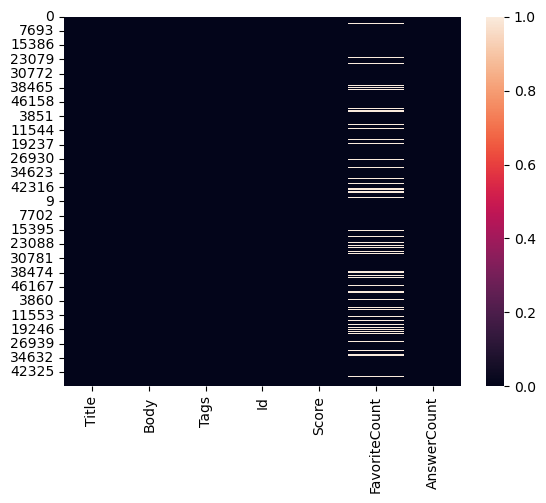

In [40]:
sns.heatmap(data.isna())

In [41]:
# Pas de lignes exactement identiques
data.duplicated().sum()

0

In [43]:
# 0 corps de questions qui sont dupliqués
data.duplicated(subset = ['Body']).sum()

0

In [45]:
for col in data.columns :
    print('col',col,'-> duplicated : ', data.duplicated(subset = [col]).sum())

col Title -> duplicated :  8
col Body -> duplicated :  0
col Tags -> duplicated :  8536
col Id -> duplicated :  0
col Score -> duplicated :  198882
col FavoriteCount -> duplicated :  199995
col AnswerCount -> duplicated :  199921


In [47]:
data.describe(include = np.number)

,Id,Score,FavoriteCount,AnswerCount
count,2.000000e+05,200000.000000,174317.000000,200000.000000
mean,2.254972e+07,27.196440,0.000281,3.475995
std,1.578556e+07,140.862624,0.079905,3.560889
min,4.000000e+00,6.000000,0.000000,1.000000
25%,8.323410e+06,7.000000,0.000000,2.000000
50%,2.008313e+07,10.000000,0.000000,3.000000
75%,3.558560e+07,19.000000,0.000000,4.000000
max,5.441439e+07,26968.000000,32.000000,133.000000


In [48]:
data.describe(include = object)

,Title,Body,Tags
count,200000,200000,200000
unique,199992,200000,191464
top,HTML Agility Pack,<p>I want to assign the decimal variable &quot...,<javascript><jquery><html><css><twitter-bootst...
freq,2,1,112


In [49]:
data.describe()

,Id,Score,FavoriteCount,AnswerCount
count,2.000000e+05,200000.000000,174317.000000,200000.000000
mean,2.254972e+07,27.196440,0.000281,3.475995
std,1.578556e+07,140.862624,0.079905,3.560889
min,4.000000e+00,6.000000,0.000000,1.000000
25%,8.323410e+06,7.000000,0.000000,2.000000
50%,2.008313e+07,10.000000,0.000000,3.000000
75%,3.558560e+07,19.000000,0.000000,4.000000
max,5.441439e+07,26968.000000,32.000000,133.000000


### Selection des colonnes 

In [314]:
cols = ['Title','Body', 'Tags']
data = data[cols]
data.head()

,Title,Body,Tags
0,How to convert Decimal to Double in C#?,<p>I want to assign the decimal variable &quot...,<c#><floating-point><type-conversion><double><...
1,Calculate relative time in C#,<p>Given a specific <code>DateTime</code> valu...,<c#><datetime><time><datediff><relative-time-s...
2,Determine a user's timezone,<p>Is there a standard way for a web server to...,<html><browser><timezone><user-agent><timezone...
3,What is the fastest way to get the value of π?,<p>I'm looking for the fastest way to obtain t...,<performance><algorithm><language-agnostic><un...
4,How to use the C socket API in C++ on z/OS,<p>I'm having issues getting the C sockets API...,<c++><c><sockets><mainframe><zos>


In [332]:
data.Body[1]

'<p>Given a specific <code>DateTime</code> value, how do I display relative time, like:</p>\n<ul>\n<li><code>2 hours ago</code></li>\n<li><code>3 days ago</code></li>\n<li><code>a month ago</code></li>\n</ul>\n'

### Premier nettoyage

In [238]:
data

,Title,Body,Tags,tags
0,How to convert Decimal to Double in C#?,<p>I want to assign the decimal variable &quot...,<c#><floating-point><type-conversion><double><...,"c#,floating-point,type-conversion,double,decimal"
1,Calculate relative time in C#,<p>Given a specific <code>DateTime</code> valu...,<c#><datetime><time><datediff><relative-time-s...,"c#,datetime,time,datediff,relative-time-span"
2,Determine a user's timezone,<p>Is there a standard way for a web server to...,<html><browser><timezone><user-agent><timezone...,"html,browser,timezone,user-agent,timezone-offset"
3,What is the fastest way to get the value of π?,<p>I'm looking for the fastest way to obtain t...,<performance><algorithm><language-agnostic><un...,"performance,algorithm,language-agnostic,unix,pi"
4,How to use the C socket API in C++ on z/OS,<p>I'm having issues getting the C sockets API...,<c++><c><sockets><mainframe><zos>,"c++,c,sockets,mainframe,zos"
...,...,...,...,...
199995,Ionic 4 horizontal scroll with ngFor,<p>I'm at a loss. I can get horizontal scroll...,<css><angular><ionic-framework><ngfor><ionic4>,"css,angular,ionic-framework,ngfor,ionic4"
199996,Type hinting with descriptors,"<p>In <a href=""https://github.com/python/mypy/...",<python><python-3.x><type-hinting><mypy><pytho...,"python,python-3.x,type-hinting,mypy,python-des..."
199997,How to add multiple lines between code blocks ...,"<p>I started using Prettier, but discovered th...",<javascript><node.js><typescript><visual-studi...,"javascript,node.js,typescript,visual-studio-co..."
199998,React-Select Scrollbar Styling,<p>I am trying to change the style of scrollba...,<reactjs><frontend><scrollbar><styling><react-...,"reactjs,frontend,scrollbar,styling,react-select"


On supprime le code des questions car cela va sinon avoir un impact par la suite sur nos analyses

In [315]:
# Supprimer le code dans le body, flags prend en compte egalement les sauts de ligne 
data['Body'] = data['Body'].apply(lambda x: re.sub('<code>.*?</code>', '', x, flags=re.DOTALL))

In [316]:
data.Body[4]

"<p>I'm having issues getting the C sockets API to work properly in C++ on z/OS.</p>\n<p>Although I am including , I still get compile time errors telling me that  is not defined.</p>\n<p>Am I missing something obvious, or is this related to the fact that being on z/OS makes my problems much more complicated?</p>\n<p>I discovered that there is an  that I'm hitting. Apparently z/OS isn't happy unless I define which &quot;type&quot; of sockets I'm using with:</p>\n<pre></pre>\n<p>Now, I personally have no idea what this  is actually for, so if any z/OS sockets programmers are out there (all 3 of you), perhaps you could give me a rundown of how this all works?</p>\n<p>Test App</p>\n<pre></pre>\n<p>Compile/Link Output:</p>\n<pre></pre>\n<p>A check of sys/sockets.h does include the definition I need, and as far as I can tell, it is not being blocked by any  statements.</p>\n<p>I have however noticed it contains the following:</p>\n<pre></pre>\n<p>which encapsulates basically the whole file?

In [317]:
# Supprimer les balises html de notre corps de question 
data.Body = data.Body.apply(lambda x: bs(x, "lxml").text)

In [318]:
data.Body[4]

'I\'m having issues getting the C sockets API to work properly in C++ on z/OS.\nAlthough I am including , I still get compile time errors telling me that  is not defined.\nAm I missing something obvious, or is this related to the fact that being on z/OS makes my problems much more complicated?\nI discovered that there is an  that I\'m hitting. Apparently z/OS isn\'t happy unless I define which "type" of sockets I\'m using with:\n\nNow, I personally have no idea what this  is actually for, so if any z/OS sockets programmers are out there (all 3 of you), perhaps you could give me a rundown of how this all works?\nTest App\n\nCompile/Link Output:\n\nA check of sys/sockets.h does include the definition I need, and as far as I can tell, it is not being blocked by any  statements.\nI have however noticed it contains the following:\n\nwhich encapsulates basically the whole file? Not sure if it matters.\n'

In [319]:
# Suppresion des retours à la ligne 
to_clean = re.compile('\n')

data.Body = data.Body.apply(lambda x: re.sub(to_clean, ' ', x))

In [320]:
data.Body[4]

'I\'m having issues getting the C sockets API to work properly in C++ on z/OS. Although I am including , I still get compile time errors telling me that  is not defined. Am I missing something obvious, or is this related to the fact that being on z/OS makes my problems much more complicated? I discovered that there is an  that I\'m hitting. Apparently z/OS isn\'t happy unless I define which "type" of sockets I\'m using with:  Now, I personally have no idea what this  is actually for, so if any z/OS sockets programmers are out there (all 3 of you), perhaps you could give me a rundown of how this all works? Test App  Compile/Link Output:  A check of sys/sockets.h does include the definition I need, and as far as I can tell, it is not being blocked by any  statements. I have however noticed it contains the following:  which encapsulates basically the whole file? Not sure if it matters. '

In [321]:
data.head()

,Title,Body,Tags
0,How to convert Decimal to Double in C#?,"I want to assign the decimal variable ""trans"" ...",<c#><floating-point><type-conversion><double><...
1,Calculate relative time in C#,"Given a specific value, how do I display rela...",<c#><datetime><time><datediff><relative-time-s...
2,Determine a user's timezone,Is there a standard way for a web server to be...,<html><browser><timezone><user-agent><timezone...
3,What is the fastest way to get the value of π?,I'm looking for the fastest way to obtain the ...,<performance><algorithm><language-agnostic><un...
4,How to use the C socket API in C++ on z/OS,I'm having issues getting the C sockets API to...,<c++><c><sockets><mainframe><zos>


#### Duplicated

In [260]:
# Observation des données dupliquées sur la variable Title
idx = data.duplicated(subset = 'Title', keep = 'first')
data.loc[idx,:].sort_values('Title')

,Title,Body,Tags,tags,Body2
30860,Git post-receive hook not working,"My setup is a windows XAMPP server, with cURL ...",<git><curl><hudson><githooks><git-post-receive>,"git,curl,hudson,githooks,git-post-receive",<html><body><p>My setup is a windows XAMPP ser...
15539,HTML Agility Pack,I want to parse the html table using html agil...,<c#><.net><winforms><html-parsing><html-agilit...,"c#,.net,winforms,html-parsing,html-agility-pack",<html><body><p>I want to parse the html table ...
44368,LINQ to Entities does not recognize the method,I'm getting the following error when trying to...,<.net><linq><entity-framework><linq-to-entitie...,".net,linq,entity-framework,linq-to-entities,sp...",<html><body><p>I'm getting the following error...
22565,Pointcut matching methods with annotated param...,I need to create an aspect with a pointcut mat...,<java><parameters><annotations><aop><aspectj>,"java,parameters,annotations,aop,aspectj",<html><body><p>I need to create an aspect with...
71179,The ObjectContext instance has been disposed a...,I'm having trouble with one of my queries beca...,<entity-framework><lazy-loading><entity-framew...,"entity-framework,lazy-loading,entity-framework...",<html><body><p>I'm having trouble with one of ...


In [322]:
# Suppression des doublons sur cette variable
data.drop_duplicates(subset = 'Title', inplace = True)

#### NA

In [310]:
data.isna().mean()

Title    0.0
Body     0.0
Tags     0.0
dtype: float64

### EDA

#### Taille des textes

In [311]:
data.describe()

,Title,Body,Tags
count,199992,199992,199992
unique,199992,199971,191456
top,How to convert Decimal to Double in C#?,,<javascript><jquery><html><css><twitter-bootst...
freq,1,19,112


In [324]:
tmp1

0         39
1         29
2         27
3         46
4         42
          ..
199995    36
199996    29
199997    60
199998    30
199999    58
Name: Title, Length: 199992, dtype: int64

2023-05-18 23:39:28,028 [19188] WARNING  py.warnings:109: [JupyterRequire] C:\Users\aguer\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(



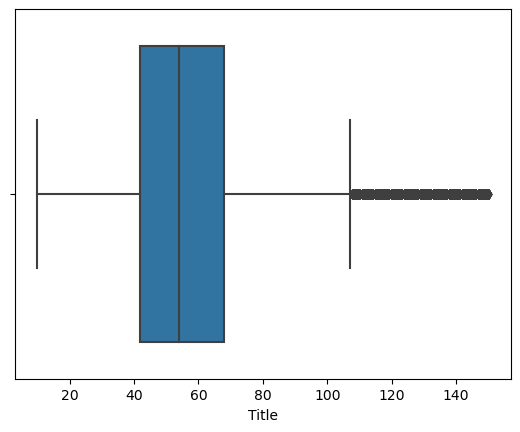

In [356]:
tmp1 = data.Title.str.len()
sns.boxplot(tmp1)
plt.show()

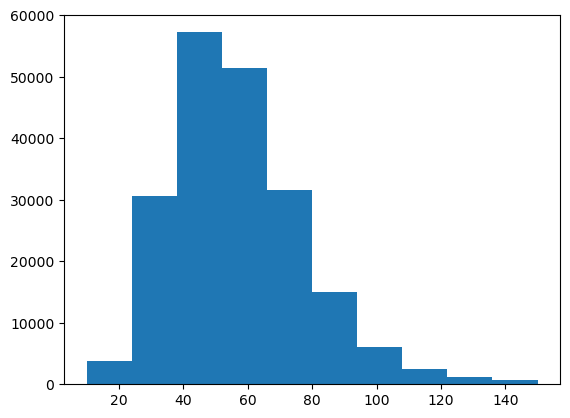

In [357]:
plt.hist(tmp1)
plt.show()

2023-05-18 23:40:17,380 [19188] WARNING  py.warnings:109: [JupyterRequire] C:\Users\aguer\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(



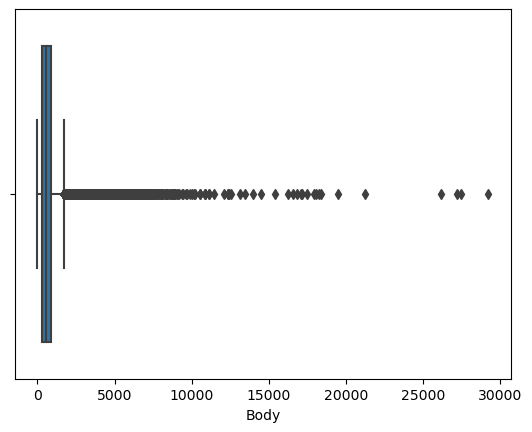

In [358]:
tmp2 = data.Body.str.len()
sns.boxplot(tmp2)
plt.show()

In [365]:
from sklearn.preprocessing import KBinsDiscretizer

In [366]:
# Discretizer for Body characters lenght
X = pd.DataFrame(data.Body.str.len())

# Sklearn discretizer with 200 bins
discretizer = KBinsDiscretizer(n_bins=200,
                               encode='ordinal',
                               strategy='uniform')
body_lenght = discretizer.fit_transform(X)
body_lenght = discretizer.inverse_transform(body_lenght)
body_lenght = pd.Series(body_lenght.reshape(-1))

2023-05-18 23:47:07,032 [19188] WARNING  matplotlib.legend:1217: [JupyterRequire] No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


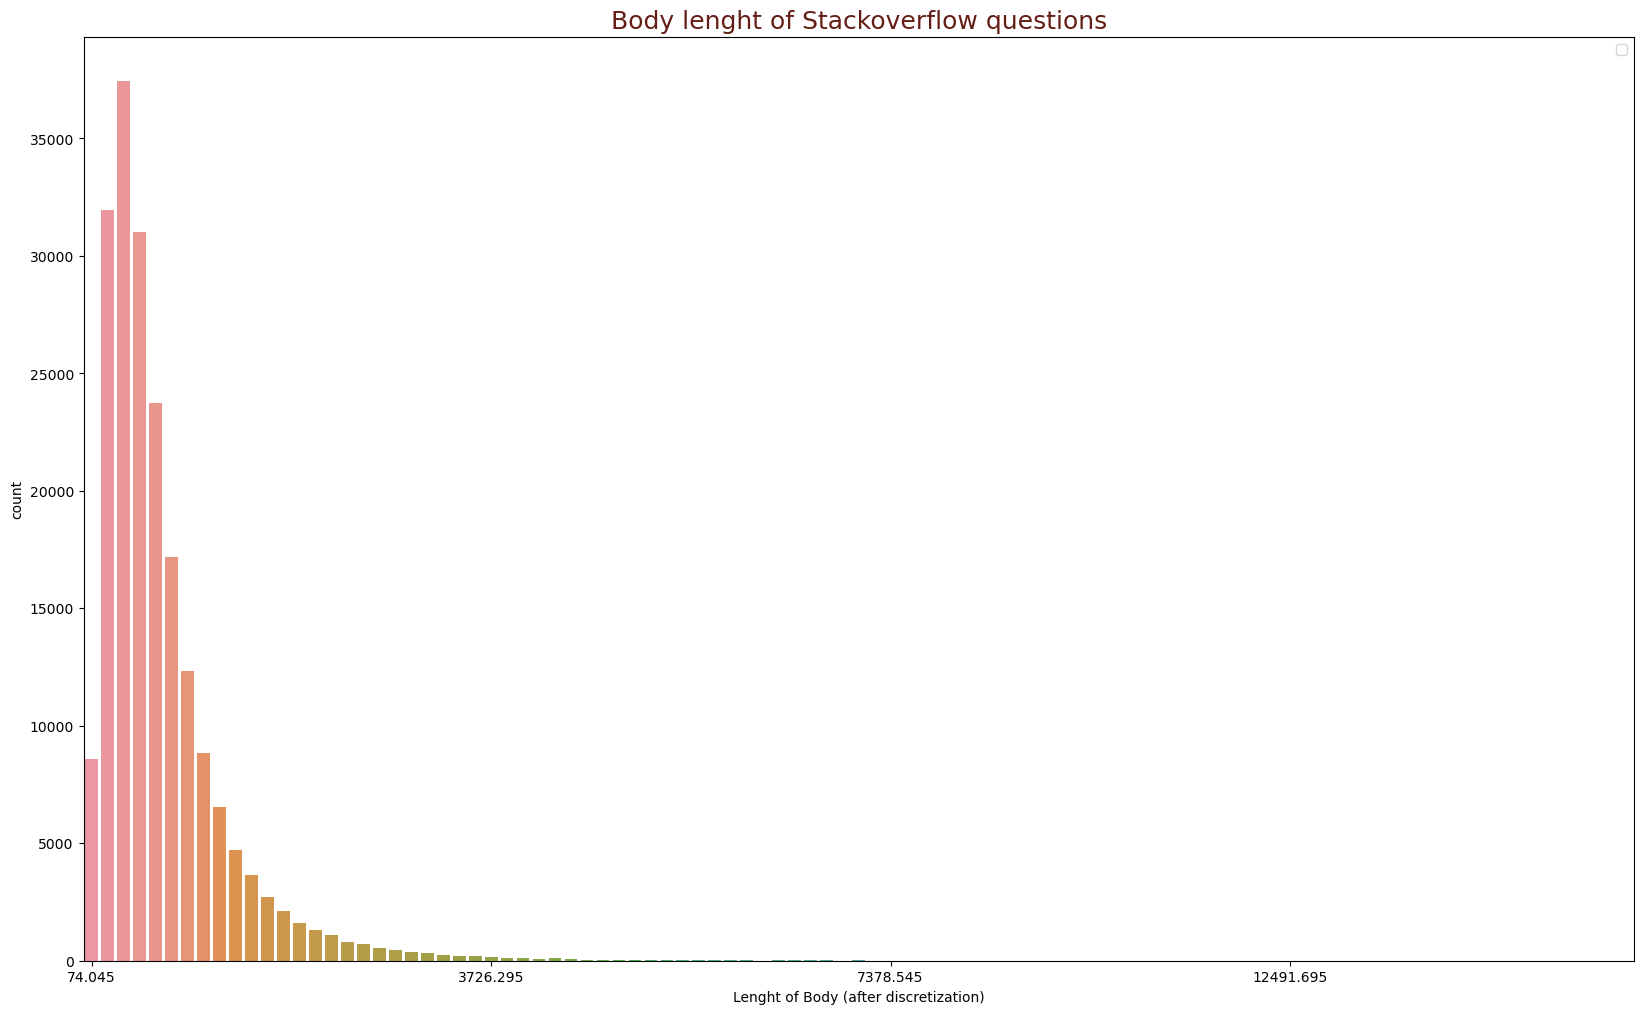

In [368]:
fig = plt.figure(figsize=(20, 12))
ax = sns.countplot(x=body_lenght)
start, end = ax.get_xlim()
ax.xaxis.set_ticks(np.arange(0, end, 25))
ax.set_xlabel("Lenght of Body (after discretization)")
plt.title("Body lenght of Stackoverflow questions",
          fontsize=18, color="#641E16")
plt.legend()
plt.show()

On remarque que la plupart des corps de questions ne possèdent pas plus de 2500 charactères donc nous allons conserver ces questions pour éviter d'avoir des temps de calcul trop longs.

In [318]:
data.shape

(199992, 3)

In [323]:
data[data.Body.str.len()>2500]

,Title,Body,Tags
23,Heap corruption under Win32; how to locate?,I'm working on a multithreaded C++ application...,<c++><windows><multithreading><debugging><memory>
93,Can I get Memcached running on a Windows (x64)...,"Does anyone know IF, WHEN or HOW I can get Mem...",<c#><c++><windows><64-bit><memcached>
276,Large File Download,Internet Explorer has a file download limit of...,<java><flash><silverlight><browser><large-files>
329,A python web application framework for tight D...,I'm a firm believer of the heretic thought of ...,<python><sql><metadata><coupling><data-driven>
387,High availability and scalable platform for Ja...,I have an application that's a mix of Java and...,<java><c++><scalability><solaris><high-availab...
...,...,...,...
199905,How to separate out parsing from validation in...,Background I have a set of configuration JSON ...,<scala><validation><serialization><version><sc...
199913,Why can't Microsoft analyzers find Microsoft.C...,I'm trying to add Microsoft.CodeAnalysis.FXCop...,<c#><code-analysis><fxcop><analyzer><microsoft...
199916,CORS issue with Django and React hosted on sam...,I am having a CORS issue with my Django Rest F...,<django><reactjs><nginx><cors><vagrant>
199974,EF Core with GraphQL,I'm currently exploring the GraphQL developmen...,<c#><asp.net-core><entity-framework-core><grap...


In [324]:
data = data[data.Body.str.len()<2500]

In [325]:
data.shape

(195784, 3)

In [176]:
# On ajoute nos variables de taille à notre dataset 
data['_len_Title'] = data.Title.str.len()
data['_len_Body'] = data.Body.str.len()

In [294]:
data

,Title,Body,tags
0,How to convert Decimal to Double in C#?,"I want to assign the decimal variable ""trans"" ...","c#,floating-point,type-conversion,double,decimal"
1,Calculate relative time in C#,"Given a specific value, how do I display rela...","c#,datetime,time,datediff,relative-time-span"
2,Determine a user's timezone,Is there a standard way for a web server to be...,"html,browser,timezone,user-agent,timezone-offset"
3,What is the fastest way to get the value of π?,I'm looking for the fastest way to obtain the ...,"performance,algorithm,language-agnostic,unix,pi"
4,How to use the C socket API in C++ on z/OS,I'm having issues getting the C sockets API to...,"c++,c,sockets,mainframe,zos"
...,...,...,...
199995,Ionic 4 horizontal scroll with ngFor,I'm at a loss. I can get horizontal scroll to...,"css,angular,ionic-framework,ngfor,ionic4"
199996,Type hinting with descriptors,In this pull request it looks like type hintin...,"python,python-3.x,type-hinting,mypy,python-des..."
199997,How to add multiple lines between code blocks ...,"I started using Prettier, but discovered that ...","javascript,node.js,typescript,visual-studio-co..."
199998,React-Select Scrollbar Styling,I am trying to change the style of scrollbar f...,"reactjs,frontend,scrollbar,styling,react-select"


#### Analyse multivariée

In [180]:
corr = data[['_len_Title','_len_Body']].corr()
corr

,_len_Title,_len_Body
_len_Title,1.000000,0.132463
_len_Body,0.132463,1.000000


On remarque que la taille du titre n'est pas vraiment liée à la taille du corps de la question

In [163]:
data.sort_values("_len_Title").head(10)

,Title,Body,_len_Title,_len_Body
4521,TFS vs SVN,I am about to start a project (.NET) and need ...,10,526
7337,AJAXify site,I have legitimate reasons to do what I am tryi...,12,753
426,IMAP forwarder,I'm wondering what is the quickest and most re...,14,1249
782,Unrooted Tests,When running all my tests in Eclipse (Eclipse ...,14,925
49974,Screen recorder,I'm interested in a library(for windows) writt...,15,678
72213,"mov %eax,(%esp)",What is the difference between the following s...,15,217
26072,Get domain name,My computer is in a Domain (Active Directory) ...,15,953
46295,X.509 libraries,I'm looking for a library/module/package with ...,15,1008
149395,IF syntax error,I'm getting a syntax error while following the...,15,568
41438,3D in WinForms?,How can i use 3D view inside WinForms? Should ...,15,306


In [165]:
data.sort_values("_len_Title").tail(10)

,Title,Body,_len_Title,_len_Body
188225,WebSocket connection to 'ws://localhost:4000/s...,I'M using Browser Sync with webpack-dev-server...,150,3031
170013,Error message : [MC] Reading from public effec...,"When I use the following code, I have error me...",150,1810
23209,Using Encrypt=yes in a Sql Server connection s...,I'm using Encrypt=yes in a SQL Server connecti...,150,592
102398,"Why does my STS client get this error? ""The va...",I frequently encounter this error and my effor...,150,1826
99260,How to get service reference to generate corre...,I have a problem that given 3rd party WSDL I a...,150,3095
198556,Black background behind a figure's labels and ...,I have a strange problem where if I save a fig...,150,518
127845,How to redirect the user to a mobile app or a ...,I've a website which is already developed usin...,150,2909
179007,Using Jackson/Java to ensure that and all seri...,I have the following Fortify security issue: ...,150,1060
111263,java.lang.ClassCastException: com.sun.net.ssl....,I tried this code in my Netbeans 7.4 and it wo...,150,5038
140475,"""A value of type FixedToolBar cannot be added ...",We have a custom control called FixedToolBar d...,150,917


In [166]:
data.sort_values("_len_Body").head(10)

,Title,Body,_len_Title,_len_Body
3478,Are there scala-like mixins for C++?,Scala Mixins,36,13
771,"What is semantic markup, and why would I want ...",Like it says.,58,14
7181,Need to cancel click/mouseup events when doubl...,How is this done?,68,18
8653,Why the web.config isn't copied when I publish...,How to correct it?,130,19
20513,Is there a .NET data-type smaller than a byte?,How about a Nibble etc.,46,24
26470,Does myBatis implement JPA?,An easy question I suppose,27,27
1829,What is Type-safe?,"What does ""type-safe"" mean?",18,28
5764,Is there any performance difference between fo...,Or is it all about semantics?,62,30
11631,How to call a C# dll in ruby?,How to call a C# dll in ruby?,29,30
9247,What is the difference between a definition an...,The meaning of both eludes me.,62,31


In [183]:
data.sort_values("_len_Body").tail(10)

,Title,Body,Tags,_len_Title,_len_Body
39431,PNG Transparency Resize with SimpleImage.php C...,<p>I'm using a modified version of the SimpleI...,<php><class><resize><png><transparency>,50,3999
138359,mockito test gives no such method error when r...,<p>I've been facing a peculiar problem. Basica...,<java><maven><junit><mockito><powermock>,131,3999
125355,JPA shared cache / second level cache in WildFly,<p>I'm using WildFly 8.1 so JPA 2.1 and Hibern...,<hibernate><jpa><wildfly><second-level-cache><...,48,3999
188856,"proper implementation of ""windows"" authenticat...",<p>I've created a Web Api 2 app which will onl...,<c#><.net><asp.net-web-api><asp.net-web-api2><...,61,3999
124104,Python Pip install Error: Unable to find vcvar...,<p>I tried to install Scrapy for Python 2.7.8 ...,<python><windows><visual-studio><python-2.7><pip>,75,3999
192482,How to update several attributes of an item in...,<p>I'm trying to update several attributes of ...,<python><database><python-3.x><amazon-dynamodb...,67,3999
195872,RecyclerView doesn't Update until Soft Keyboar...,<p>I have a <strong>Posts Feed</strong> (Somet...,<android><android-layout><android-recyclerview...,61,3999
195488,R and RStudio not detecting installed PostgreS...,<p>I am trying to connect to a PostgreSQL data...,<r><odbc><rstudio><rodbc><rpostgresql>,76,3999
132003,JAXB: Unmarshal heterogeneous array,<p>I'm trying to unmarshal using MOXy a json w...,<java><json><jaxb><unmarshalling><moxy>,35,3999
55834,CreateRemoteThread returning ERROR_ACCESS_DENI...,<p>I'm trying to write a program that uses <co...,<winapi><dll><windows-7><code-injection><creat...,74,3999


In [184]:
data.drop(columns = ['_len_Title', '_len_Body'], inplace = True)
data.head()

,Title,Body,Tags
0,How to convert Decimal to Double in C#?,<p>I want to assign the decimal variable &quot...,<c#><floating-point><type-conversion><double><...
1,Calculate relative time in C#,<p>Given a specific <code>DateTime</code> valu...,<c#><datetime><time><datediff><relative-time-s...
2,Determine a user's timezone,<p>Is there a standard way for a web server to...,<html><browser><timezone><user-agent><timezone...
3,What is the fastest way to get the value of π?,<p>I'm looking for the fastest way to obtain t...,<performance><algorithm><language-agnostic><un...
4,How to use the C socket API in C++ on z/OS,<p>I'm having issues getting the C sockets API...,<c++><c><sockets><mainframe><zos>


### Nettoyage des tags

In [326]:
# On récupère ce qu'il y a entre les charactères <>, en conservant la ponctuation
def extract_tags(text):
    tags = re.findall(r'<(.*?)>', text)
    return ','.join(tags)

# Appliquer la fonction extract_tags à la colonne 'tags'
data['Tags'] = data['Tags'].apply(extract_tags)

In [327]:
# Créer un dataframe pour compter le nombre de tags uniques 
list_words = []
for word in data['Tags'].str.split(','):
    list_words.extend(word)
df_list_words = pd.DataFrame(list_words, columns=["Tag"])

In [328]:
# Nombre de tags uniques
unique_tags = df_list_words.nunique()
print('On a {} tags uniques'.format(unique_tags.item()))

On a 28576 tags uniques


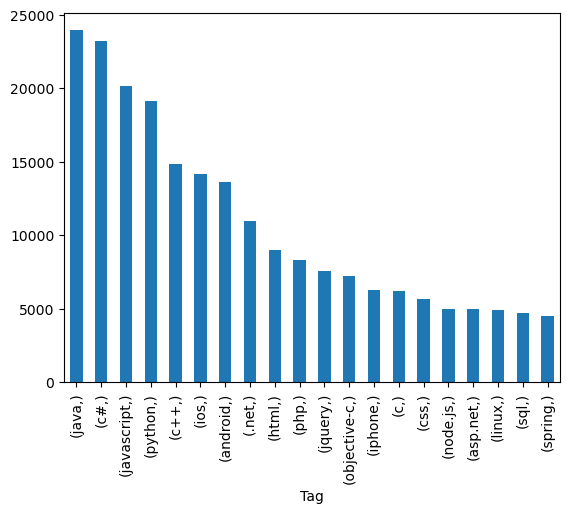

In [329]:
# Afficher les tags les plus utilisés
df_list_words.value_counts()[:20].plot.bar()
plt.show()

In [331]:
data

,Title,Body,Tags
0,How to convert Decimal to Double in C#?,"I want to assign the decimal variable ""trans"" ...","c#,floating-point,type-conversion,double,decimal"
1,Calculate relative time in C#,"Given a specific value, how do I display rela...","c#,datetime,time,datediff,relative-time-span"
2,Determine a user's timezone,Is there a standard way for a web server to be...,"html,browser,timezone,user-agent,timezone-offset"
3,What is the fastest way to get the value of π?,I'm looking for the fastest way to obtain the ...,"performance,algorithm,language-agnostic,unix,pi"
4,How to use the C socket API in C++ on z/OS,I'm having issues getting the C sockets API to...,"c++,c,sockets,mainframe,zos"
...,...,...,...
199995,Ionic 4 horizontal scroll with ngFor,I'm at a loss. I can get horizontal scroll to...,"css,angular,ionic-framework,ngfor,ionic4"
199996,Type hinting with descriptors,In this pull request it looks like type hintin...,"python,python-3.x,type-hinting,mypy,python-des..."
199997,How to add multiple lines between code blocks ...,"I started using Prettier, but discovered that ...","javascript,node.js,typescript,visual-studio-co..."
199998,React-Select Scrollbar Styling,I am trying to change the style of scrollbar f...,"reactjs,frontend,scrollbar,styling,react-select"


In [330]:
data.to_csv('data/cleaned/df_cleaned.csv', index = False)

### Exploration rapide du corpus 

In [2]:
data = pd.read_csv('data/cleaned/df_cleaned.csv')

In [3]:
data

,Title,Body,Tags
0,How to convert Decimal to Double in C#?,"I want to assign the decimal variable ""trans"" ...","c#,floating-point,type-conversion,double,decimal"
1,Calculate relative time in C#,"Given a specific value, how do I display rela...","c#,datetime,time,datediff,relative-time-span"
2,Determine a user's timezone,Is there a standard way for a web server to be...,"html,browser,timezone,user-agent,timezone-offset"
3,What is the fastest way to get the value of π?,I'm looking for the fastest way to obtain the ...,"performance,algorithm,language-agnostic,unix,pi"
4,How to use the C socket API in C++ on z/OS,I'm having issues getting the C sockets API to...,"c++,c,sockets,mainframe,zos"
...,...,...,...
195779,Ionic 4 horizontal scroll with ngFor,I'm at a loss. I can get horizontal scroll to...,"css,angular,ionic-framework,ngfor,ionic4"
195780,Type hinting with descriptors,In this pull request it looks like type hintin...,"python,python-3.x,type-hinting,mypy,python-des..."
195781,How to add multiple lines between code blocks ...,"I started using Prettier, but discovered that ...","javascript,node.js,typescript,visual-studio-co..."
195782,React-Select Scrollbar Styling,I am trying to change the style of scrollbar f...,"reactjs,frontend,scrollbar,styling,react-select"


In [12]:
def print_sample(sub_df, n_samp = 10):
    '''print out n_samp documents from a corpus'''
    
    samp = sub_df.sample(n_samp)
    
    for idx, ser in samp.iterrows():
        txt_1 = f"title : {ser['Title']}\n"
        print(txt_1 + ser['Body'] + '\n\n')

In [190]:
print_sample(data)

title : Attach generated PDF in Mailgun message Django/Python
I'm trying to switch our application from python mail to Mailgun but am having trouble with emails that have attachments. Specifically PDF's that are generated by the application (not stored in the file system). Have no problems sending emails without attachments. Currently we generate the PDF as such: pdf = StringIO() draw_pdf(pdf, params) pdf.seek(0) attachment = MIMEApplication(pdf.read()) attachment.add_header("Content-Disposition", "attachment", filename=filename) pdf.close()  And then attach and mail it as such: from django.core.mail import EmailMultiAlternatives msg = EmailMultiAlternatives(subject, text_content, from_email, to_email)  if html_content:     msg.attach_alternative(html_content, "text/html")  if attachment:     msg.attach(attachment)  msg.send()  Works great... how can we convert to a Mailgun call? I've tried various things including just passing it as file as is (unsuccessfully): requests.post(mailgun_u

In [4]:
# Definition des stopwords, après observation des mots à l'aide d'un wordcloud on peut etendre cette liste 
stop_words = stopwords.words('english')
stop_words.extend(['like','want', 'would', 'also', 'however', 'something', 'example', 'one', 'see', 'could', 'trying', 'tried', 'thank', 'thanks'])
stop_words = set(stop_words)
print(stop_words)

{'ain', "won't", 'trying', 'above', 'further', 'also', 'only', 'those', 'been', 'weren', 'she', 'too', 'than', 'if', 'you', 'at', 'y', "it's", 'haven', "wouldn't", 'off', 'while', 'down', 've', 'am', 'some', 'wouldn', 'want', 'like', 'here', 'because', 'each', 'other', 'most', 'would', "doesn't", "hasn't", 'being', 'a', 'that', "shouldn't", 'more', 'thank', 'didn', 'of', 'does', 'as', "haven't", 'again', 'hasn', 'over', 'with', 'ours', 'itself', "should've", 'below', "hadn't", 'what', 'theirs', 'have', 'under', 'one', 'for', 's', 'now', 'or', 'on', 'an', "aren't", 'who', 'has', 'however', "isn't", "that'll", 'through', 'was', 'were', 'yourself', 'until', 'out', 'yours', 'he', 'against', 'these', 'from', 'when', "mightn't", 'wasn', 'the', 'm', 'don', 'me', "mustn't", 'own', 'they', 'tried', 'to', 'it', 'thanks', 'which', 'something', "needn't", 'himself', 'd', 'then', 'example', 'why', 'ma', 'i', 'had', "you've", 'very', 't', 'into', 'having', 'up', 'by', 'and', 'is', 'my', "you're", 'd

#### Premier fonction de nettoyage

In [5]:
def process_text_1(doc, rejoin= False):
    '''basic fonction of text processing'''
    
    # lower (strip pour supprimer les espaces)
    doc = doc.lower().strip()
    
    # tokenize
    tokenizer = RegexpTokenizer(r'\b\w+#?\b')
    raw_tokens_list = tokenizer.tokenize(doc)
    
    # stopwords
    cleaned_tokens_list = [w for w in raw_tokens_list if w not in stop_words]
    
    # si on veut renvoyer juste les tokens séparés par un espace dans une même chaîne
    if rejoin :
        return " ".join(cleaned_tokens_list)
    
    return cleaned_tokens_list

#### Travailler sur le corpus complet

In [6]:
# Joindre les lignes 
raw_corpus1 = "".join(data.Title.values)
raw_corpus2 = "".join(data.Body.values)

In [7]:
print('Taille des titres :', len(raw_corpus1))
print('Taille des corps de question: ', len(raw_corpus2))

Taille des titres : 11007193
Taille des corps de question:  127542838


In [8]:
# process the corpus 
corpus1 = process_text_1(raw_corpus1)
corpus2 = process_text_1(raw_corpus2)

In [32]:
# Définition d'une fonction d'affichage 
def display_tokens_infos(tokens) : 
    '''display info about corpus'''
    print(f'nb tokens {len(tokens)}, nb tokens uniques {len(set(tokens))}')
    print(tokens[:30])

In [388]:
# Afficher le corpus
display_tokens_infos(corpus1)

nb tokens 1153895, nb tokens uniques 133305
['convert', 'decimal', 'double', 'c', 'calculate', 'relative', 'time', 'c#', 'determine', 'user', 'timezonewhat', 'fastest', 'way', 'get', 'value', 'π', 'use', 'c', 'socket', 'api', 'c', 'z', 'osis', 'gettimeofday', 'guaranteed', 'microsecond', 'resolution', 'decoding', 'sql', 'cast']


In [389]:
# Afficher le corpus
display_tokens_infos(corpus2)

nb tokens 11804389, nb tokens uniques 196095
['want', 'assign', 'decimal', 'variable', 'trans', 'double', 'variable', 'opacity', 'build', 'app', 'gives', 'following', 'error', 'cannot', 'implicitly', 'convert', 'type', 'decimal', 'double', 'given', 'specific', 'value', 'display', 'relative', 'time', 'like', 'standard', 'way', 'web', 'server']


In [9]:
# mot unique -> pas important

tmp1 = pd.Series(corpus1).value_counts()
list_unique_words_title = tmp1[tmp1==1]

tmp2 = pd.Series(corpus2).value_counts()
list_unique_words_body = tmp2[tmp2==1]

In [10]:
def process_text_vf(doc 
                  ,rejoin = False
                  ,lemm_or_stem = 'stem' 
                  ,list_rare_words = []
                  ,min_len_word = 3
                  #,force_is_alpha = True
                   ):
    '''
    
    positionnal arguments : 
    -----------------------
    doc : str : the docuemnt (aka a text in str format) to process
    
    opt args : 
    -----------------------
    rejoin : bool if True return a string else return a list of tokens
    lemm_or_stem : string : if lem do lemmantize else stemmentize
    list_rare_words : list : a list of rare words to exclude
    
# J'ai utilisé ça mais je ne sais pas si dans le cas de certains caracteres il faudrait enlever cette condition(C, π...)
    min_len_word : int : the minimum length of word to not exclude
    force_is_alpha : int : if 1, exclude all tokens with a numeric character

    
    return :
    -----------------------
    a string (if rejoin is True) or a list of tokens
    '''
    
        
    #lower
    doc = doc.lower().strip()
    
    #Supprimer les url
    doc = re.sub(r'http*\S+', '', doc)
    # Supprimer les espace inutiles 
    doc = re.sub('\\s+', ' ', doc)
    # Supprimer les nombres
    doc = re.sub(r'\w*\d+\w*', '', doc)
    
    # tokenize
    tokenizer = RegexpTokenizer(r'\b\w+#?\b')
    raw_tokens_list = tokenizer.tokenize(doc)
    
    
    # classic stop words
    cleaned_tokens_list = [w for w in raw_tokens_list if w not in stop_words]
    
    # no rare tokens
    non_rare_tokens = [w for w in cleaned_tokens_list if w not in list_rare_words]
    
    # no more len words
    more_than_N = [w for w in non_rare_tokens if len(w)>= min_len_word]
    
    # only alpha chars, le problème c'est que on supprimera les #
    #if force_is_alpha :
    #    alpha_tokens = [w for w in more_than_N if w.isalpha()]
    #else :
    #    alpha_tokens = more_than_N
    
    # stem or lem
    if lemm_or_stem == 'lem' :
        trans = WordNetLemmatizer()
        trans_text = [trans.lemmatize(i) for i in more_than_N]
    else :
        trans = PorterStemmer()
        trans_text = [trans.stem(i) for i in more_than_N]
        
 
    
    # manage return type
    if rejoin :
        return ' '.join(trans_text)
    
    return trans_text

In [83]:
# Tester sur les titres
corpus1 = process_text_vf(raw_corpus1, lemm_or_stem = 'lem', rejoin = False)
display_tokens_infos(corpus1)

nb tokens 1066754, nb tokens uniques 121168
['convert', 'decimal', 'double', 'calculate', 'relative', 'time', 'determine', 'user', 'timezonewhat', 'fastest', 'way', 'get', 'value', 'use', 'socket', 'api', 'osis', 'gettimeofday', 'guaranteed', 'microsecond', 'resolution', 'decoding', 'sql', 'cast', 'nethow', 'export', 'data', 'sql', 'server', 'mysqlhow']


In [84]:
# Tester sur les corps de question (~10 min)
corpus2 = process_text_vf(raw_corpus2, lemm_or_stem = 'lem', rejoin = False)
display_tokens_infos(corpus2)

nb tokens 10309855, nb tokens uniques 141250
['assign', 'decimal', 'variable', 'trans', 'double', 'variable', 'opacity', 'build', 'app', 'give', 'following', 'error', 'cannot', 'implicitly', 'convert', 'type', 'decimal', 'double', 'given', 'specific', 'value', 'display', 'relative', 'time', 'standard', 'way', 'web', 'server', 'able', 'determine']


2023-05-19 11:54:45,458 [7012] WARNING  py.warnings:109: [JupyterRequire] C:\Users\aguer\anaconda3\lib\site-packages\wordcloud\wordcloud.py:519: DeprecationWarning: ROTATE_90 is deprecated and will be removed in Pillow 10 (2023-07-01). Use Transpose.ROTATE_90 instead.
  orientation = (Image.ROTATE_90 if orientation is None else

2023-05-19 11:54:45,522 [7012] WARNING  py.warnings:109: [JupyterRequire] C:\Users\aguer\anaconda3\lib\site-packages\wordcloud\wordcloud.py:499: DeprecationWarning: ROTATE_90 is deprecated and will be removed in Pillow 10 (2023-07-01). Use Transpose.ROTATE_90 instead.
  orientation = Image.ROTATE_90

2023-05-19 11:54:45,525 [7012] WARNING  py.warnings:109: [JupyterRequire] C:\Users\aguer\anaconda3\lib\site-packages\wordcloud\wordcloud.py:520: DeprecationWarning: ROTATE_90 is deprecated and will be removed in Pillow 10 (2023-07-01). Use Transpose.ROTATE_90 instead.
  Image.ROTATE_90)

2023-05-19 11:54:45,533 [7012] WARNING  py.warnings:109: [JupyterRequire] C:\U

2023-05-19 11:54:45,827 [7012] WARNING  py.warnings:109: [JupyterRequire] C:\Users\aguer\anaconda3\lib\site-packages\wordcloud\wordcloud.py:499: DeprecationWarning: ROTATE_90 is deprecated and will be removed in Pillow 10 (2023-07-01). Use Transpose.ROTATE_90 instead.
  orientation = Image.ROTATE_90

2023-05-19 11:54:45,836 [7012] WARNING  py.warnings:109: [JupyterRequire] C:\Users\aguer\anaconda3\lib\site-packages\wordcloud\wordcloud.py:519: DeprecationWarning: ROTATE_90 is deprecated and will be removed in Pillow 10 (2023-07-01). Use Transpose.ROTATE_90 instead.
  orientation = (Image.ROTATE_90 if orientation is None else



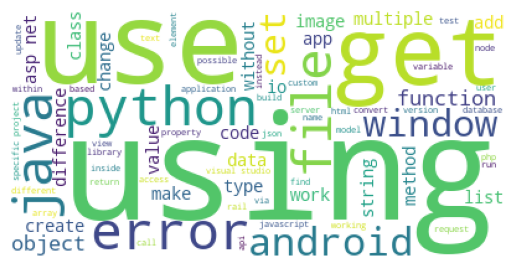

In [85]:
wordcloud = WordCloud(background_color = 'white', stopwords= [], max_words = 75).generate(' '.join(corpus1))
plt.imshow(wordcloud)
plt.axis('off')
plt.show() ;

2023-05-19 11:56:22,864 [7012] WARNING  py.warnings:109: [JupyterRequire] C:\Users\aguer\anaconda3\lib\site-packages\wordcloud\wordcloud.py:519: DeprecationWarning: ROTATE_90 is deprecated and will be removed in Pillow 10 (2023-07-01). Use Transpose.ROTATE_90 instead.
  orientation = (Image.ROTATE_90 if orientation is None else

2023-05-19 11:56:22,929 [7012] WARNING  py.warnings:109: [JupyterRequire] C:\Users\aguer\anaconda3\lib\site-packages\wordcloud\wordcloud.py:519: DeprecationWarning: ROTATE_90 is deprecated and will be removed in Pillow 10 (2023-07-01). Use Transpose.ROTATE_90 instead.
  orientation = (Image.ROTATE_90 if orientation is None else

2023-05-19 11:56:22,960 [7012] WARNING  py.warnings:109: [JupyterRequire] C:\Users\aguer\anaconda3\lib\site-packages\wordcloud\wordcloud.py:519: DeprecationWarning: ROTATE_90 is deprecated and will be removed in Pillow 10 (2023-07-01). Use Transpose.ROTATE_90 instead.
  orientation = (Image.ROTATE_90 if orientation is None else

2023-05

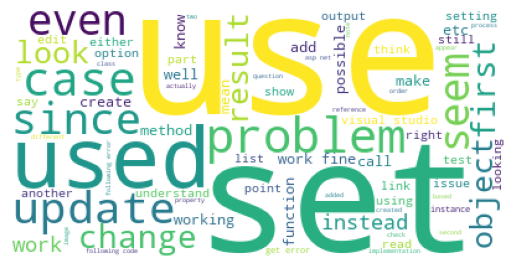

In [86]:
wordcloud = WordCloud(background_color = 'white', stopwords= [], max_words = 75).generate(' '.join(corpus2))
plt.imshow(wordcloud)
plt.axis('off')
plt.show() ;

In [68]:
pd.Series(corpus1).value_counts().head(50)

using          13953
file            8649
use             6686
error           5518
net             5438
get             5204
data            4964
android         4641
java            4522
python          4191
string          4089
function        4074
object          4002
value           3944
class           3932
type            3865
window          3674
image           3610
app             3584
way             3546
method          3323
code            3264
multiple        3234
array           3203
server          3044
set             3024
without         3019
io              2969
test            2958
web             2859
list            2777
spring          2763
application     2763
api             2660
text            2590
create          2564
work            2458
sql             2426
json            2405
custom          2392
asp             2378
add             2346
time            2307
one             2289
make            2285
change          2265
javascript      2263
studio       

In [69]:
pd.Series(corpus2).value_counts().head(50)

using          117787
code            99659
file            84427
use             83637
get             78163
work            71307
way             64787
error           61358
one             58109
need            52808
problem         52061
following       47621
data            47175
know            43764
method          43764
app             43105
application     42983
user            42668
class           42374
trying          41173
tried           40276
function        39938
time            39205
question        38698
server          36090
value           35843
run             35405
project         34538
make            34355
object          33654
test            33620
set             33298
see             30944
new             30069
could           29720
type            29680
image           28154
find            27497
call            27409
help            27246
solution        26972
page            26450
working         26083
thanks          25503
change          25104
first     

### LDA

Pour appliquer nos modèles de machine learning, il est indispensable de transformer nos données textuelles en données numériques

In [11]:
# Lemmatization
start_time = time.time()

title_lem = data.Title.apply(lambda x : process_text_vf(x, lemm_or_stem ='lem', list_rare_words = list_unique_words_title, rejoin = False))

end_time = time.time()

interval = end_time - start_time

print(f"Intervalle de temps : {interval} secondes")

Intervalle de temps : 19.024980545043945 secondes


In [12]:
# Lemmatization body 
start_time = time.time()

body_lem = data.Body.apply(lambda x : process_text_vf(x, lemm_or_stem ='lem', list_rare_words = list_unique_words_body, rejoin = False))

end_time = time.time()

interval = end_time - start_time

print(f"Intervalle de temps : {interval} secondes")

Intervalle de temps : 113.84198546409607 secondes


In [13]:
df = pd.DataFrame()

In [14]:
df['title_lem'] = title_lem
df['body_lem'] = body_lem
df['tags'] = data['Tags']

In [15]:
df.head()

,title_lem,body_lem,tags
0,"[convert, decimal, double]","[assign, decimal, variable, trans, double, var...","c#,floating-point,type-conversion,double,decimal"
1,"[calculate, relative, time]","[given, specific, value, display, relative, time]","c#,datetime,time,datediff,relative-time-span"
2,"[determine, user, timezone]","[standard, way, web, server, able, determine, ...","html,browser,timezone,user-agent,timezone-offset"
3,"[fastest, way, get, value]","[looking, fastest, way, obtain, value, persona...","performance,algorithm,language-agnostic,unix,pi"
4,"[use, socket, api]","[issue, getting, socket, api, work, properly, ...","c++,c,sockets,mainframe,zos"


#### Suppression des outliers

In [16]:
df.dtypes

title_lem    object
body_lem     object
tags         object
dtype: object

In [17]:
len_body_lem = df['body_lem'].apply(lambda x: len(x))

In [18]:
#len_body_lem = df['body_lem'].apply(lambda x: len(word_tokenize(x)))

In [19]:
# Questions avec un corps de question de plus de 200 mots
len_outliers = len(len_body_lem[len_body_lem>200])

In [20]:
print('Les body de plus de 200 mots representent', round(len_outliers/len(df)*100, 5), '%')

Les body de plus de 200 mots representent 0.22116 %


In [21]:
df['len_body'] = len_body_lem

In [22]:
# On conserve les questions qui ont au minimum 5 tokens dans leur body, pour eviter le manque d'information
df = df[df.len_body>=5]

In [23]:
df.shape

(195009, 4)

In [24]:
df = df[['title_lem', 'body_lem', 'tags']]

In [25]:
df = df.rename(columns={"title_lem": "title", "body_lem": "body"})

In [26]:
df2 = df.copy()

In [27]:
df2.head()

,title,body,tags
0,"[convert, decimal, double]","[assign, decimal, variable, trans, double, var...","c#,floating-point,type-conversion,double,decimal"
1,"[calculate, relative, time]","[given, specific, value, display, relative, time]","c#,datetime,time,datediff,relative-time-span"
2,"[determine, user, timezone]","[standard, way, web, server, able, determine, ...","html,browser,timezone,user-agent,timezone-offset"
3,"[fastest, way, get, value]","[looking, fastest, way, obtain, value, persona...","performance,algorithm,language-agnostic,unix,pi"
4,"[use, socket, api]","[issue, getting, socket, api, work, properly, ...","c++,c,sockets,mainframe,zos"


In [45]:
df = df2

In [28]:
# Modifier notre dataframe
# df['title'] = [str(word) for word in df['title']]
# df['body'] = [str(word) for word in df['body']]
# df['tags'] = [str(word) for word in df['tags']]
df['texte'] = df["title"] + df["body"]
#df['texte'] = df["title"] +[' ']+ df["body"]

In [29]:
# Definir le texte
# texte = df["texte"].tolist() 
# texte = [document.split() for document in texte]

In [30]:
# Définir les tags 
tags = df['tags'].tolist() 
tags = [document.split(',') for document in tags]

In [31]:
# df['texte'] = texte

In [32]:
df['tags'] = tags

On décide de ne conserver que les questions qui contiennent au moins un des 100 tags les plus utilisés dans toutes les questions. On supprime les tags restant pour éviter de surcharger notre dataset.
Cela va permettre de réduire la taille de notre dataset et d'esperer obtenir de meilleurs performances. 

In [53]:
# Compter l'occurrence de chaque tag dans la nouvelle liste
tag_counts = Counter(tag for document_tags in tags for tag in document_tags)

# Sélectionner les 100 tags les plus utilisés
top_100_tags = {tag for tag, _ in tag_counts.most_common(100)}

In [58]:
# # Filtrer le dataframe pour ne conserver que les lignes contenant au moins un des 100 tags les plus utilisés
df['tags'] = df['tags'].apply(lambda x: [tag for tag in x if tag in top_100_tags])

# On recupère les listes non vides, donc les questions qui contiennent un des 100 tags les plus présents
df = df[df['tags'].apply(lambda x: len(x) > 0)]

In [59]:
df['tags']

0                                      [c#]
1                                      [c#]
2                                    [html]
3                  [performance, algorithm]
4                                  [c++, c]
                        ...                
195779                       [css, angular]
195780                 [python, python-3.x]
195781    [javascript, node.js, typescript]
195782                            [reactjs]
195783                   [machine-learning]
Name: tags, Length: 182208, dtype: object

In [61]:
df.head()

,title,body,tags,texte
0,"[convert, decimal, double]","[assign, decimal, variable, trans, double, var...",[c#],"[convert, decimal, double, assign, decimal, va..."
1,"[calculate, relative, time]","[given, specific, value, display, relative, time]",[c#],"[calculate, relative, time, given, specific, v..."
2,"[determine, user, timezone]","[standard, way, web, server, able, determine, ...",[html],"[determine, user, timezone, standard, way, web..."
3,"[fastest, way, get, value]","[looking, fastest, way, obtain, value, persona...","[performance, algorithm]","[fastest, way, get, value, looking, fastest, w..."
4,"[use, socket, api]","[issue, getting, socket, api, work, properly, ...","[c++, c]","[use, socket, api, issue, getting, socket, api..."


In [62]:
df.shape

(182208, 4)

In [63]:
# Enregistrer en csv
df.to_csv('data/cleaned/df_tokenize.csv', index = False)

### Approche non supervisée

#### Utilisation de gensim 

In [84]:
# Chargement du fichier 
path = 'data/cleaned/df_tokenize.csv'
df = pd.read_csv(path, converters={"tags": literal_eval, "texte" : literal_eval})

In [154]:
df.head()

,title,body,tags,texte
0,"['convert', 'decimal', 'double']","['assign', 'decimal', 'variable', 'trans', 'do...",[c#],"[convert, decimal, double, assign, decimal, va..."
1,"['calculate', 'relative', 'time']","['given', 'specific', 'value', 'display', 'rel...",[c#],"[calculate, relative, time, given, specific, v..."
2,"['determine', 'user', 'timezone']","['standard', 'way', 'web', 'server', 'able', '...",[html],"[determine, user, timezone, standard, way, web..."
3,"['fastest', 'way', 'get', 'value']","['looking', 'fastest', 'way', 'obtain', 'value...","[performance, algorithm]","[fastest, way, get, value, looking, fastest, w..."
4,"['use', 'socket', 'api']","['issue', 'getting', 'socket', 'api', 'work', ...","[c++, c]","[use, socket, api, issue, getting, socket, api..."


In [155]:
texte = df["texte"].values.tolist()

In [156]:
# Create dictionnary (bag of words)
id2word = corpora.Dictionary(texte)
id2word.filter_extremes(no_below=4, no_above=0.6, keep_n=None)
# Create Corpus 
texts = texte 
# Term Document Frequency 
corpus = [id2word.doc2bow(texte) for texte in texts]  
# View 
print(corpus[:1])

[[(0, 1), (1, 1), (2, 1), (3, 1), (4, 2), (5, 3), (6, 3), (7, 1), (8, 1), (9, 1), (10, 1), (11, 1), (12, 1), (13, 1), (14, 2)]]


L'utilisation de la commande filter_extremes permet de traiter les outliers.  
On ne garde pas les mots trop peu fréquents (dans moins de 4 documents) et les mots trop fréquents (dans plus de 70% des documents).  
Ces mots pourraient être des termes peu informatifs.

Le lda multicore permet de travailler sur les différents processeurs pour gagner en temps de calcul.

In [78]:
# Build LDA model
full_lda_model = gensim.models.ldamulticore\
                    .LdaMulticore(corpus=corpus,
                                  id2word=id2word,
                                  num_topics=20,
                                  random_state=0,
                                  per_word_topics=True,
                                  workers=4)
# Print Perplexity score
print('\nPerplexity: ', full_lda_model.log_perplexity(corpus))

#Print Coherence Score
coherence_model_lda = CoherenceModel(model=full_lda_model, 
                                     texts=texts, 
                                     dictionary=id2word, 
                                     coherence='c_v')
coherence_lda = coherence_model_lda.get_coherence()
print('\nCoherence Score: ', coherence_lda)


Perplexity:  -7.896656379987238

Coherence Score:  0.366381874702652


In [79]:
topics_test = full_lda_model.show_topics(num_topics=21)

keywords_per_topic = [[word for word, _ in full_lda_model.show_topic(topic_id)] for topic_id, _ in topics_test]
print(keywords_per_topic)

[['file', 'project', 'error', 'build', 'run', 'using', 'version', 'command', 'package', 'studio'], ['font', 'using', 'point', 'use', 'code', 'vector', 'get', 'svg', 'xml', 'element'], ['object', 'java', 'code', 'use', 'type', 'lambda', 'class', 'reference', 'android', 'way'], ['swift', 'notification', 'device', 'work', 'using', 'android', 'window', 'app', 'event', 'user'], ['class', 'using', 'use', 'code', 'method', 'error', 'gradle', 'work', 'framework', 'library'], ['view', 'controller', 'user', 'key', 'model', 'table', 'net', 'asp', 'using', 'mvc'], ['file', 'memory', 'stream', 'using', 'process', 'read', 'use', 'way', 'size', 'data'], ['image', 'using', 'button', 'code', 'page', 'text', 'work', 'html', 'change', 'screen'], ['token', 'user', 'python', 'get', 'using', 'code', 'authentication', 'api', 'way', 'use'], ['array', 'list', 'number', 'object', 'value', 'using', 'node', 'use', 'way', 'result'], ['io', 'xcode', 'code', 'set', 'work', 'get', 'problem', 'error', 'crash', 'audio'

Workers est le nombre de coeurs disponibles dans l'ordinateur.

In [172]:
pyLDAvis.enable_notebook()


pyLDAvis.gensim.prepare(full_lda_model, corpus, id2word)

PreparedData(topic_coordinates=              x         y  topics  cluster      Freq
topic                                               
7      0.150649 -0.066169       1        1  7.425341
10    -0.030061  0.109275       2        1  6.914104
16    -0.053735  0.110395       3        1  6.811578
5      0.115613  0.020354       4        1  6.505059
14    -0.025837 -0.011622       5        1  6.302852
2      0.042666  0.021520       6        1  5.966783
13    -0.099329 -0.153687       7        1  5.894696
9     -0.091307  0.071576       8        1  5.604596
12     0.131481 -0.034793       9        1  5.583345
8      0.071498  0.004412      10        1  5.539564
4      0.008924 -0.000044      11        1  5.000571
15    -0.105654 -0.063343      12        1  4.462178
6     -0.044895  0.044912      13        1  4.381779
0      0.052456  0.000773      14        1  4.269966
3     -0.017839 -0.094058      15        1  4.018271
17    -0.038952 -0.003972      16        1  3.678628
18    -0.046488 -0.044759      17        1  3.188785
19    -0.029536 -0.024634      18        1  3.151399
1      0.021816  0.092869      19        1  2.875141
11    -0.011470  0.020995      20        1  2.425365, topic_info=           Term          Freq         Total Category  logprob  loglift
82         test  37360.000000  37360.000000  Default  30.0000  30.0000
108        file  91546.000000  91546.000000  Default  29.0000  29.0000
649       image  34301.000000  34301.000000  Default  28.0000  28.0000
4630    android  27913.000000  27913.000000  Default  27.0000  27.0000
489    function  51393.000000  51393.000000  Default  26.0000  26.0000
...         ...           ...           ...      ...      ...      ...
7         error   1516.223360  82002.562467  Topic20  -5.1917  -0.2713
444    question   1317.414616  40097.992444  Topic20  -5.3322   0.3035
8     following   1318.848628  53900.901178  Topic20  -5.3311   0.0088
108        file   1395.599094  91546.436578  Topic20  -5.2746  -0.4643
121        need   1205.241219  51840.983195  Topic20  -5.4212  -0.0423

[1772 rows x 6 columns], token_table=       Topic      Freq      Term
term                            
8944      20  0.957607  __main__
17644     11  0.953209    _blank
16659      8  0.015398       aac
16659     13  0.931573       aac
16659     17  0.030796       aac
...      ...       ...       ...
13893     11  0.008918       zsh
13893     14  0.004459       zsh
13893     20  0.980966       zsh
4823       2  0.013153     zxing
4823      13  0.973331     zxing

[13110 rows x 3 columns], R=30, lambda_step=0.01, plot_opts={'xlab': 'PC1', 'ylab': 'PC2'}, topic_order=[8, 11, 17, 6, 15, 3, 14, 10, 13, 9, 5, 16, 7, 1, 4, 18, 19, 20, 2, 12])

On cherche à maximiser le nombre de topics

In [ ]:
# Optimiser le nombre de topics en se basant sur le score de coherence 
coherence_scores = []
for n in np.arange(1,90,10):
    print("LDA pour n =", n)
    # Entrainer le LDA
    lda_model = gensim.models.ldamulticore\
                    .LdaMulticore(corpus=corpus,
                                  id2word=id2word,
                                  num_topics=n,
                                  random_state=0,
                                  per_word_topics=True,
                                  workers=4)
    # Calculer le score de coherence
    coherence_model_lda = CoherenceModel(model=lda_model,
                                         texts=texts,
                                         dictionary=id2word,
                                         coherence='c_v')
    # Recuperer le score de coherence
    coherence_lda = coherence_model_lda.get_coherence()
    # Stocker dans une liste
    coherence_scores.append((n, coherence_lda))

LDA pour n = 1
LDA pour n = 11
LDA pour n = 21
LDA pour n = 31
LDA pour n = 41
LDA pour n = 51


In [ ]:
# Mettre nos résultats dans un dataFrame 
coherence_scores = pd.DataFrame(coherence_scores, columns = ["n", "coherence"])

In [ ]:
max_topics = coherence_scores.loc[coherence_scores['coherence'] == coherence_scores['coherence'].max(), 'n'].values[0]
print(max_topics)

In [ ]:
coherence_scores

In [74]:
# Construire le modèle avec le nombre optimal de topics 
lda_final = gensim.models.ldamulticore\
                    .LdaMulticore(corpus=corpus,
                                  id2word=id2word,
                                  num_topics= max_topics,
                                  random_state=0,
                                  per_word_topics=True,
                                  workers=4)

In [75]:
pyLDAvis.enable_notebook()
pyLDAvis.gensim.prepare(lda_final, corpus, id2word)

PreparedData(topic_coordinates=              x         y  topics  cluster       Freq
topic                                                
20    -0.098033  0.029026       1        1  10.887192
14     0.106051  0.053969       2        1   8.235605
16    -0.020255 -0.136607       3        1   6.156260
3     -0.096471  0.058854       4        1   5.840094
18    -0.122173  0.045216       5        1   5.695004
10     0.113171  0.004283       6        1   5.660587
0      0.072979  0.054777       7        1   5.521093
17    -0.068509 -0.115308       8        1   5.498249
12     0.034772  0.061953       9        1   5.120450
8     -0.040768 -0.084482      10        1   4.503639
11     0.117944  0.032902      11        1   4.499617
7     -0.052079  0.020972      12        1   4.283298
1      0.112790 -0.045467      13        1   4.147896
19    -0.020126  0.021067      14        1   3.622463
5      0.019071 -0.119248      15        1   3.474625
9     -0.083796  0.071596      16        1   3.336018
15     0.009952  0.086111      17        1   3.060444
13    -0.026111 -0.003069      18        1   3.026602
6     -0.029785  0.015834      19        1   3.016961
2      0.038235 -0.022674      20        1   2.308040
4      0.033140 -0.029701      21        1   2.105863, topic_info=          Term          Freq         Total Category  logprob  loglift
82        test  34233.000000  34233.000000  Default  30.0000  30.0000
108       file  86987.000000  86987.000000  Default  29.0000  29.0000
649      image  30119.000000  30119.000000  Default  28.0000  28.0000
30      string  26330.000000  26330.000000  Default  27.0000  27.0000
21       value  42497.000000  42497.000000  Default  26.0000  26.0000
..         ...           ...           ...      ...      ...      ...
214     method    914.118284  45769.854559  Topic21  -5.4836  -0.0530
126    problem    903.250175  50164.803031  Topic21  -5.4955  -0.1566
675       find    850.222358  28219.024347  Topic21  -5.5560   0.3582
8    following    877.740228  50622.517547  Topic21  -5.5242  -0.1944
730     change    833.439040  27702.973840  Topic21  -5.5760   0.3567

[1909 rows x 6 columns], token_table=       Topic      Freq      Term
term                            
8517      18  0.940042  __main__
16724     18  0.974194    _blank
15771      3  0.046029       aac
15771      5  0.036823       aac
15771     10  0.036823       aac
...      ...       ...       ...
2226      17  0.004218      zone
2226      18  0.001055      zone
2226      19  0.001055      zone
2226      20  0.001055      zone
4584       8  0.992542     zxing

[14695 rows x 3 columns], R=30, lambda_step=0.01, plot_opts={'xlab': 'PC1', 'ylab': 'PC2'}, topic_order=[21, 15, 17, 4, 19, 11, 1, 18, 13, 9, 12, 8, 2, 20, 6, 10, 16, 14, 7, 3, 5])

In [90]:
topics = lda_final.show_topics(num_topics=21)

keywords_per_topic = [[word for word, _ in lda_final.show_topic(topic_id)] for topic_id, _ in topics]
print(keywords_per_topic)

[['table', 'query', 'database', 'column', 'data', 'sql', 'time', 'using', 'date', 'row'], ['string', 'value', 'array', 'using', 'character', 'code', 'convert', 'way', 'get', 'xml'], ['cache', 'pdf', 'document', 'group', 'using', 'php', 'node', 'result', 'file', 'get'], ['net', 'using', 'application', 'server', 'user', 'request', 'code', 'error', 'asp', 'connection'], ['value', 'using', 'code', 'form', 'key', 'input', 'select', 'get', 'use', 'server'], ['view', 'line', 'using', 'code', 'controller', 'point', 'font', 'problem', 'get', 'work'], ['test', 'unit', 'run', 'code', 'testing', 'using', 'get', 'error', 'work', 'key'], ['io', 'use', 'device', 'using', 'app', 'data', 'azure', 'code', 'way', 'know'], ['image', 'file', 'using', 'video', 'code', 'work', 'use', 'get', 'upload', 'way'], ['server', 'client', 'java', 'node', 'using', 'service', 'certificate', 'error', 'python', 'code'], ['array', 'memory', 'code', 'using', 'function', 'matrix', 'vector', 'numpy', 'data', 'use'], ['functio

On tente ensuite d'observer les métriques métiers.  
Dans un premier temps, on s'intéresse au taux de couverture des topics par rapport aux tags.

In [77]:
tags = df['tags'].values.tolist()

In [79]:
tags[0:5]

[['c#'], ['c#'], ['html'], ['performance', 'algorithm'], ['c++', 'c']]

In [80]:
# Taux de couverture des questions 
topic_counts = {}

for i, question in enumerate(corpus):
    # Appliquer le modèle LDA pour obtenir les topics les plus pertinents
    topics = lda_final.get_document_topics(question)
    
    # Compter le nombre de fois que chaque topic apparaît
    for topic in topics:
        if topic[0] not in topic_counts:
            topic_counts[topic[0]] = 1
        else:
            topic_counts[topic[0]] += 1

# Calculer le nombre total de questions
num_questions = len(df)

# Calculer le pourcentage de questions couvertes par chaque topic
topic_coverage = {topic: (count / num_questions) * 100 for topic, count in topic_counts.items()}

# Afficher les résultats
for topic, coverage in topic_coverage.items():
    print(f"Topic {topic}: {coverage}%")

Topic 1: 17.08377239199157%
Topic 2: 12.279373024236039%
Topic 14: 23.6400158061117%
Topic 16: 18.56669301018616%
Topic 20: 25.968673164734806%
Topic 0: 17.636437478047068%
Topic 5: 13.591609589041095%
Topic 17: 18.79719880576045%
Topic 18: 17.34501229364243%
Topic 6: 12.99558746048472%
Topic 10: 16.606844924481912%
Topic 3: 16.859852476290833%
Topic 15: 12.994489813839131%
Topic 12: 16.689717246224095%
Topic 8: 15.936731647348084%
Topic 7: 15.444437126800139%
Topic 19: 14.974095539164031%
Topic 11: 18.198432560590096%
Topic 4: 11.312346329469618%
Topic 13: 14.036156480505795%
Topic 9: 13.244204425711276%


In [81]:
topic = topic_coverage.keys()
values = topic_coverage.values()

Text(0.5, 1.0, "Couverture des topics sur l'ensemble des questions")

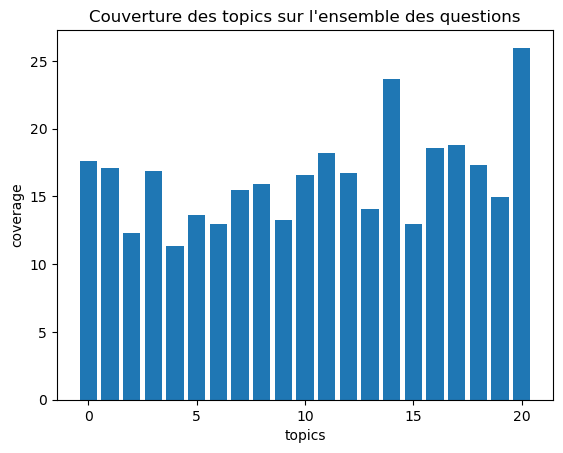

In [82]:
plt.bar(topic, values)
plt.xlabel('topics')
plt.ylabel('coverage')
plt.title("Couverture des topics sur l'ensemble des questions")

In [93]:
topics = pd.DataFrame(lda_final.get_document_topics(corpus,minimum_probability=0))
# On récupère le 2eme element, donc la valeur de la contribution du topic en question pour cette question (l'indice 0 represente le numero du topic)
topics = topics.applymap(lambda x: x[1]) 

In [153]:
topics.head()

NameError: name 'topics' is not defined

In [96]:
# Calculer le nombre total de questions
num_questions = len(df)

# Calculer le pourcentage de couverture des topics par rapport aux questions
topic_coverage = topics.apply(lambda x: (x.sum() / num_questions) * 100)

# Afficher les résultats
print(topic_coverage)

0      5.859340
1      5.063041
2      2.299793
3      5.185378
4      2.317890
5      3.575447
6      3.144477
7      3.911896
8      4.689846
9      3.127196
10     5.104008
11     4.816553
12     4.548655
13     3.163686
14     8.553980
15     2.952343
16     6.637706
17     5.751071
18     5.097297
19     3.616559
20    10.583836
dtype: float64


### Approche supervisé 

Nous sommes dans l'obligation de sous echantilloner nos données, sinon nous ne pouvons pas réaliser le multilabelbinazer() en raison de la mémoire disponible sur ma machine.

In [4]:
#df_sample = df.sample(frac = 0.5)

In [87]:
# Definition de la target 
target = df['tags']

In [88]:
target

0                                      [c#]
1                                      [c#]
2                                    [html]
3                  [performance, algorithm]
4                                  [c++, c]
                        ...                
182203                       [css, angular]
182204                 [python, python-3.x]
182205    [javascript, node.js, typescript]
182206                            [reactjs]
182207                   [machine-learning]
Name: tags, Length: 182208, dtype: object

In [6]:
# Multilabel binarizer car la target est multiclass
multilabel_binarizer = MultiLabelBinarizer()
multilabel_binarizer.fit(target)
target_binarized = multilabel_binarizer.transform(target)

print(target_binarized.shape)

(182208, 100)


## Regression logistique 

### Approche bag of words

Le TF-IDF attribue un score à chaque terme dans chaque document de la collection.  
Ce score reflète l'importance relative du terme dans le document spécifique et la collection dans son ensemble.  
Les termes qui ont des scores TF-IDF élevés sont considérés comme plus représentatifs et informatifs pour un document donné.  
En attribuant des poids aux termes en fonction de leur pertinence, le TF-IDF permet de mieux représenter et comprendre le contenu des documents, facilitant ainsi l'extraction d'informations utiles à partir des textes.  
On utilise cela pour convertir une collection de documents texte en une représentation numérique basée sur la fréquence des termes et l'inverse de la fréquence des documents (TF-IDF).

In [89]:
# Définition de X 
X = df['texte']

In [8]:
# Initialize the "CountVectorizer" TFIDF for Full_doc
vectorizer = TfidfVectorizer(max_df=.6, min_df=0.005, preprocessor=' '.join, lowercase=False)

X_tfidf = vectorizer.fit_transform(X)

Les mots qui apparaissent dans plus de 60% des documents seront ignorés, car ils sont susceptibles d'être des mots communs ou peu informatifs (max_df).  
Les mots qui apparaissent dans moins de 0.4% des documents seront ignorés, car ils sont susceptibles d'être des mots rares ou spécifiques à certains documents (min_df).  
Le preprocessor est utilisé pour joindre les tokens d'un document en 1 chaine de caractere.  
On a déjà supprimé les stopwords et mis tous le texte en minuscule.

On sépare à présent nos données en jeu d'entraînement et de test

In [9]:
# Create train and test split (30%)
X_train_tfidf , X_test_tfidf , y_train, y_test = train_test_split(X_tfidf, target_binarized, test_size=0.3, random_state=0)

In [11]:
X_test_tfidf.shape

(54663, 1357)

In [12]:
lr_tf_idf = OneVsRestClassifier(LogisticRegression(solver = "liblinear"))

# On fitte sur nos données
lr_tf_idf.fit(X_train_tfidf, y_train)

OneVsRestClassifier(estimator=LogisticRegression(solver='liblinear'))

Optimisation des hyper-parametres, cela prends très longtemps donc dans un premier temps on teste avec les paramètres de base. 

In [ ]:
# Utilisation d'un grid search pour optimiser les paramètres de notre regression logistique
# "estimator__C": [0.1, 1, 10, 100] plus de 1h20
#parameters = {"estimator__C": [1, 10],
#               "estimator__penalty": ["l1", "l2"],
#               "estimator__solver": ["liblinear"]}

#lr_tf_idf = GridSearchCV(OneVsRestClassifier(LogisticRegression()), param_grid=parameters, n_jobs=-1, cv=5, scoring="f1_weighted", return_train_score = True, refit=True)

# On fitte sur nos données
#lr_tf_idf.fit(X_train_tfidf, y_train)

In [ ]:
# Affichage des hyperparametres optimaux
best_params = lr_tf_idf.best_params_
best_params

Pour justifier les choix de mon grid search :  
- ‘liblinear’ is limited to one-versus-rest schemes  
- Supported penality : ‘liblinear’ - [‘l1’, ‘l2’]

On utilise estimator__C car c'est la façon de faire quand on utilise grid search avec des pipelines.  
On met estimator__parametre pour que le GridSearchCV comprenne quelle partie du pipeline doit être configurée avec le paramètre spécifié.  
n_jobs = -1 -> pour utiliser tous les processeurs.  
On utilisera la métrique f1_weighted car le score F1 est calculé en prenant en compte le déséquilibre des classes dans ce cas. 

In [13]:
# Calculer les prédictions 
y_pred_tfidf_log = lr_tf_idf.predict(X_test_tfidf)

Si on veut observer les prédictions avec les tags écrits de façon textuelle, il faut repasser la commande inverse_transform à nos valeurs prédites

In [16]:
# Transformer nos labels 
y_pred_texte = multilabel_binarizer.inverse_transform(y_pred_tfidf_log)
y_test_texte = multilabel_binarizer.inverse_transform(y_test)

print("Predicted:", y_pred_texte[0:10])
print("True:", y_test_texte[0:10])

Predicted: [(), (), (), ('sql', 'sql-server'), ('c#', 'visual-studio'), ('android',), ('html', 'javascript'), ('ruby', 'ssl'), ('android', 'android-studio'), ('c#',)]
True: [('python',), ('database', 'postgresql'), ('java', 'ubuntu'), ('sql-server',), ('c#', 'debugging', 'visual-studio'), ('android', 'css', 'javascript'), ('html', 'javascript'), ('ruby', 'ssl'), ('android', 'android-studio'), ('.net', 'c#')]


On peut remarquer que notre modèle commet certaines erreurs, comme pour les 3 premières prédictions, mais qu'il apprend quand même bien pour prédire les tags suivants.

- Le Jaccard Score est une métrique qui varie de 0 à 1, où une valeur de 1 indique une correspondance parfaite entre les ensembles d'étiquettes et une valeur de 0 indique une absence totale de correspondance.  
- Plus le Jaccard Score est proche de 1, meilleur est le modèle de prédiction de tags, car cela signifie que les étiquettes prédites sont similaires aux étiquettes réelles

In [145]:
# Métrique de comparaison
lr_tf_idf_jaccard_score = jaccard_score(y_test, y_pred_tfidf_log, average="samples")

In [146]:
lr_tf_idf_jaccard_score

0.3877510076895402

### SGDClassifier

La fonction de perte logarithmique mesure la performance du modèle en comparant les prédictions de probabilité du modèle aux véritables étiquettes de classe.

In [138]:
start_time = time.time()
sgd_tf_idf = OneVsRestClassifier(SGDClassifier(loss = "log"))

# On fitte sur nos données
sgd_tf_idf.fit(X_train_tfidf, y_train)

end_time = time.time()

interval = end_time - start_time

print(f"Intervalle de temps : {interval} secondes")

Intervalle de temps : 41.05625367164612 secondes


In [139]:
# Calculer les prédictions 
y_pred_tfidf_sgd = sgd_tf_idf.predict(X_test_tfidf)

In [140]:
# Transformer nos labels 
y_pred_texte_sgd = multilabel_binarizer.inverse_transform(y_pred_tfidf_sgd)

print("Predicted:", y_pred_texte_sgd[0:10])
print("True:", y_test_texte[0:10])

Predicted: [(), (), (), ('sql', 'sql-server'), ('c#', 'visual-studio'), ('android',), ('javascript',), (), ('android',), ()]
True: [('python',), ('database', 'postgresql'), ('java', 'ubuntu'), ('sql-server',), ('c#', 'debugging', 'visual-studio'), ('android', 'css', 'javascript'), ('html', 'javascript'), ('ruby', 'ssl'), ('android', 'android-studio'), ('.net', 'c#')]


In [147]:
# Métrique de comparaison 
sgd_tf_idf_jaccard_score = jaccard_score(y_test, y_pred_tfidf_sgd, average="samples")

In [148]:
sgd_tf_idf_jaccard_score

0.24405264987285732

#### Word2vec

In [90]:
max_sentence = df['texte'].apply(lambda x : len(x))
print("max length bow : ", max_sentence.max())

max length bow :  269


In [91]:
df['texte']

0         [convert, decimal, double, assign, decimal, va...
1         [calculate, relative, time, given, specific, v...
2         [determine, user, timezone, standard, way, web...
3         [fastest, way, get, value, looking, fastest, w...
4         [use, socket, api, issue, getting, socket, api...
                                ...                        
182203    [ionic, horizontal, scroll, ngfor, loss, get, ...
182204    [type, hinting, descriptor, pull, request, loo...
182205    [add, multiple, line, code, block, prettier, s...
182206    [react, select, scrollbar, styling, change, st...
182207    [convert, sklearn, svm, svc, classifier, kera,...
Name: texte, Length: 182208, dtype: object

In [24]:
w2v_size=300
w2v_window=5
w2v_min_count=1
w2v_epochs=100
maxlen = 271 # On adapte à la taille max de nos phrases
sentences = X

In [26]:
# Entrainement du modèle Word2vec

print("Build & train Word2Vec model ...")
w2v_model = gensim.models.Word2Vec(min_count=w2v_min_count, window=w2v_window,
                                                vector_size=w2v_size,
                                                seed=42,
                                                workers=4)
#                                                workers=multiprocessing.cpu_count())

w2v_model.build_vocab(sentences)
w2v_model.train(sentences, total_examples=w2v_model.corpus_count, epochs=w2v_epochs)
model_vectors = w2v_model.wv
w2v_words = model_vectors.index_to_key
print("Vocabulary size: %i" % len(w2v_words))
print("Word2Vec trained")

Build & train Word2Vec model ...
Vocabulary size: 67355
Word2Vec trained


- w2v_model : on configure les paramètres du modèle un par un. Je ne fournis pas les phrases de paramètre et laisse donc le modèle non initialisé.  
- w2v_model.build() : on construit le vocabulaire à partir d'une suite de phrases et initialise le modèle.  
- w2v_model.train() : on entraine le modele.

In [68]:
w2v_words[0:10]

['using',
 'code',
 'file',
 'use',
 'get',
 'work',
 'error',
 'way',
 'need',
 'problem']

Le but est maintenant de préparer nos tokens en créant un vocabulaire à partir de nos données. Les tokens sont associés à un id unique. On crée un vocabulaire à partir d'un corpius de texte

In [30]:
print("Fit Tokenizer ...")
tokenizer = Tokenizer()
tokenizer.fit_on_texts(sentences)
x_sentences = pad_sequences(tokenizer.texts_to_sequences(sentences),
                                                     maxlen=maxlen,
                                                     padding='post') 
                                                   
num_words = len(tokenizer.word_index) + 1
print("Number of unique words: %i" % num_words)

Fit Tokenizer ...
Number of unique words: 67356


In [31]:
# Création de la matrice d'embedding

print("Create Embedding matrix ...")
w2v_size = 300
word_index = tokenizer.word_index
vocab_size = len(word_index) + 1
embedding_matrix = np.zeros((vocab_size, w2v_size))
i=0
j=0
    
for word, idx in word_index.items():
    i +=1
    if word in w2v_words:
        j +=1
        embedding_vector = model_vectors[word]
        if embedding_vector is not None:
            embedding_matrix[idx] = model_vectors[word]
            
word_rate = np.round(j/i,4)
print("Word embedding rate : ", word_rate)
print("Embedding matrix: %s" % str(embedding_matrix.shape))

Create Embedding matrix ...
Word embedding rate :  1.0
Embedding matrix: (67356, 300)


### Modele d'embedding 

In [32]:
# Création du modèle

input=Input(shape=(len(x_sentences),maxlen),dtype='float64')
word_input=Input(shape=(maxlen,),dtype='float64')  
word_embedding=Embedding(input_dim=vocab_size,
                         output_dim=w2v_size,
                         weights = [embedding_matrix],
                         input_length=maxlen)(word_input)
word_vec=GlobalAveragePooling1D()(word_embedding)  
embed_model = Model([word_input],word_vec)

embed_model.summary()

Model: "model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_2 (InputLayer)        [(None, 271)]             0         
                                                                 
 embedding (Embedding)       (None, 271, 300)          20206800  
                                                                 
 global_average_pooling1d (G  (None, 300)              0         
 lobalAveragePooling1D)                                          
                                                                 
Total params: 20,206,800
Trainable params: 20,206,800
Non-trainable params: 0
_________________________________________________________________


### Execution du modèle 

In [55]:
embeddings = embed_model.predict(x_sentences)
embeddings.shape

5694/5694 [==============================] - 39s 7ms/step


(182208, 300)

In [56]:
X_train_w2vec, X_test_w2vec, y_train_w2vec , y_test_w2vec = train_test_split(embeddings, target_binarized, test_size=0.3, random_state=0)

In [65]:
print("Nombre d'échantillons dans X_w2vec:", embeddings.shape[0])
print("Nombre d'échantillons dans target_binarized:", target_binarized.shape[0])

Nombre d'échantillons dans X_w2vec: 182208
Nombre d'échantillons dans target_binarized: 182208


In [60]:
# Entrainer la regression logistique 
lr_w2vec = OneVsRestClassifier(LogisticRegression(solver = "liblinear"))

# On fitte sur nos données
lr_w2vec.fit(X_train_w2vec, y_train_w2vec)

OneVsRestClassifier(estimator=LogisticRegression(solver='liblinear'))

In [62]:
# Calculer les prédictions 
y_pred_w2vec_log = lr_w2vec.predict(X_test_w2vec)

In [63]:
# Transformer nos labels 
y_pred_texte_w2vec = multilabel_binarizer.inverse_transform(y_pred_w2vec_log)
y_test_texte_w2vec = multilabel_binarizer.inverse_transform(y_test_w2vec)

print("Predicted:", y_pred_texte_w2vec[0:10])
print("True:", y_test_texte_w2vec[0:10])

Predicted: [(), (), ('java',), ('mysql', 'sql', 'sql-server'), (), ('android', 'css'), ('html', 'javascript'), ('ssl',), ('android',), ('c#', 'string')]
True: [('python',), ('database', 'postgresql'), ('java', 'ubuntu'), ('sql-server',), ('c#', 'debugging', 'visual-studio'), ('android', 'css', 'javascript'), ('html', 'javascript'), ('ruby', 'ssl'), ('android', 'android-studio'), ('.net', 'c#')]


In [149]:
# Métrique de comparaison 
lr_w2vec_jaccard_score = jaccard_score(y_test_w2vec, y_pred_w2vec_log, average="samples")

In [150]:
lr_w2vec_jaccard_score

0.3434607059353232

#### SGDClassifier

In [141]:
start_time = time.time()

# Entrainer le sgd
sgd_w2vec = OneVsRestClassifier(SGDClassifier(loss = "log"))

# On fitte sur nos données
sgd_w2vec.fit(X_train_w2vec, y_train_w2vec)

end_time = time.time()

interval = end_time - start_time

print(f"Intervalle de temps : {interval} secondes")

Intervalle de temps : 112.7276222705841 secondes


In [142]:
# Calculer les prédictions 
y_pred_w2vec_sgd = sgd_w2vec.predict(X_test_w2vec)

In [143]:
# Transformer nos labels 
y_pred_texte_w2vec_sgd = multilabel_binarizer.inverse_transform(y_pred_w2vec_sgd)

print("Predicted:", y_pred_texte_w2vec_sgd[0:10])
print("True:", y_test_texte_w2vec[0:10])

Predicted: [(), (), ('java',), ('database', 'mysql', 'postgresql', 'sql', 'sql-server'), (), ('css',), ('html', 'javascript'), (), ('android',), ('string',)]
True: [('python',), ('database', 'postgresql'), ('java', 'ubuntu'), ('sql-server',), ('c#', 'debugging', 'visual-studio'), ('android', 'css', 'javascript'), ('html', 'javascript'), ('ruby', 'ssl'), ('android', 'android-studio'), ('.net', 'c#')]


In [151]:
# Métrique de comparaison 
sgd_w2vec_jaccard_score = jaccard_score(y_test_w2vec, y_pred_w2vec_sgd, average="samples")

In [152]:
sgd_w2vec_jaccard_score

0.2304870504063743

### BERT

#### Utilisation de Hugging Face

In [71]:
# Bert
import os
import transformers
from transformers import *

os.environ["TF_KERAS"]='1'

2023-05-24 18:10:03,093 [19024] WARNING  py.warnings:109: [JupyterRequire] C:\Users\aguer\anaconda3\lib\site-packages\transformers\generation_tf_utils.py:24: FutureWarning: Importing `TFGenerationMixin` from `src/transformers/generation_tf_utils.py` is deprecated and will be removed in Transformers v5. Import as `from transformers import TFGenerationMixin` instead.
  warnings.warn(

2023-05-24 18:10:03,417 [19024] WARNING  py.warnings:109: [JupyterRequire] C:\Users\aguer\anaconda3\lib\site-packages\transformers\models\deit\image_processing_deit.py:83: DeprecationWarning: BICUBIC is deprecated and will be removed in Pillow 10 (2023-07-01). Use Resampling.BICUBIC instead.
  resample: PILImageResampling = PIL.Image.BICUBIC,

2023-05-24 18:10:03,419 [19024] WARNING  py.warnings:109: [JupyterRequire] C:\Users\aguer\anaconda3\lib\site-packages\transformers\models\deit\image_processing_deit.py:114: DeprecationWarning: BICUBIC is deprecated and will be removed in Pillow 10 (2023-07-01). Use Re

In [102]:
print(transformers.__version__)

4.29.2


In [130]:
# Fonction de préparation des sentences
def bert_inp_fct(sentences, bert_tokenizer, max_length) :
    input_ids=[]
    token_type_ids = []
    attention_mask=[]
    bert_inp_tot = []

    for sent in sentences:
        
        # Convertir la liste de mots en une phrase unique
        sent = ' '.join(sent)
        bert_inp = bert_tokenizer.encode_plus(sent,
                                              add_special_tokens = True,
                                              max_length = max_length,
                                              padding='max_length',
                                              return_attention_mask = True, 
                                              return_token_type_ids=True,
                                              truncation=True,
                                              return_tensors="tf")
    
        input_ids.append(bert_inp['input_ids'][0])
        token_type_ids.append(bert_inp['token_type_ids'][0])
        attention_mask.append(bert_inp['attention_mask'][0])
        bert_inp_tot.append((bert_inp['input_ids'][0], 
                             bert_inp['token_type_ids'][0], 
                             bert_inp['attention_mask'][0]))
        
    input_ids = np.asarray(input_ids)
    token_type_ids = np.asarray(token_type_ids)
    attention_mask = np.array(attention_mask)
    
    return input_ids, token_type_ids, attention_mask, bert_inp_tot

In [131]:
# Fonction de création des features
def feature_BERT_fct(model, model_type, sentences, max_length, b_size, mode='HF') :
    batch_size = b_size
    batch_size_pred = b_size
    bert_tokenizer = AutoTokenizer.from_pretrained(model_type)
    time1 = time.time()

    for step in range(len(sentences)//batch_size) :
        idx = step*batch_size
        input_ids, token_type_ids, attention_mask, bert_inp_tot = bert_inp_fct(sentences[idx:idx+batch_size], 
                                                                      bert_tokenizer, max_length)
        
        if mode=='HF' :    # Bert HuggingFace
            outputs = model.predict([input_ids, attention_mask, token_type_ids], batch_size=batch_size_pred)
            last_hidden_states = outputs.last_hidden_state

        if mode=='TFhub' : # Bert Tensorflow Hub
            text_preprocessed = {"input_word_ids" : input_ids, 
                                 "input_mask" : attention_mask, 
                                 "input_type_ids" : token_type_ids}
            outputs = model(text_preprocessed)
            last_hidden_states = outputs['sequence_output']
             
        if step ==0 :
            last_hidden_states_tot = last_hidden_states
            last_hidden_states_tot_0 = last_hidden_states
        else :
            last_hidden_states_tot = np.concatenate((last_hidden_states_tot,last_hidden_states))
    
    features_bert = np.array(last_hidden_states_tot).mean(axis=1)
    
    time2 = np.round(time.time() - time1,0)
    print("temps traitement : ", time2)
     
    return features_bert, last_hidden_states_tot

In [94]:
max_sentence = df['texte'].apply(lambda x : len(x))
print("max length bow : ", max_sentence.max())

max length bow :  269


On cherche un modèle existant sur Hugging Face pour pré-entrainé nos modèles.

In [97]:
from setfit import SetFitModel

In [109]:
model = TFAutoModel.from_pretrained(model_type, from_pt=True)

loading configuration file config.json from cache at C:\Users\aguer/.cache\huggingface\hub\models--Leslie123--stackoverflow-text-classification\snapshots\842f054deedc1de09effff11ca0803efba192710\config.json
Model config DistilBertConfig {
  "_name_or_path": "Leslie123/stackoverflow-text-classification",
  "activation": "gelu",
  "architectures": [
    "DistilBertModel"
  ],
  "attention_dropout": 0.1,
  "dim": 768,
  "dropout": 0.1,
  "hidden_dim": 3072,
  "initializer_range": 0.02,
  "max_position_embeddings": 512,
  "model_type": "distilbert",
  "n_heads": 12,
  "n_layers": 6,
  "output_past": true,
  "pad_token_id": 0,
  "qa_dropout": 0.1,
  "seq_classif_dropout": 0.2,
  "sinusoidal_pos_embds": false,
  "tie_weights_": true,
  "torch_dtype": "float32",
  "transformers_version": "4.29.2",
  "vocab_size": 28996
}

loading weights file pytorch_model.bin from cache at C:\Users\aguer/.cache\huggingface\hub\models--Leslie123--stackoverflow-text-classification\snapshots\842f054deedc1de09ef

In [118]:
model.config

DistilBertConfig {
  "_name_or_path": "Leslie123/stackoverflow-text-classification",
  "activation": "gelu",
  "architectures": [
    "DistilBertModel"
  ],
  "attention_dropout": 0.1,
  "dim": 768,
  "dropout": 0.1,
  "hidden_dim": 3072,
  "initializer_range": 0.02,
  "max_position_embeddings": 512,
  "model_type": "distilbert",
  "n_heads": 12,
  "n_layers": 6,
  "output_past": true,
  "pad_token_id": 0,
  "qa_dropout": 0.1,
  "seq_classif_dropout": 0.2,
  "sinusoidal_pos_embds": false,
  "tie_weights_": true,
  "torch_dtype": "float32",
  "transformers_version": "4.29.2",
  "vocab_size": 28996
}

In [125]:
max_length = 280
batch_size = 10
model_type = "Leslie123/stackoverflow-text-classification"
model = TFAutoModel.from_pretrained(model_type, from_pt=True)
sentences = df['texte'].tolist()

loading configuration file config.json from cache at C:\Users\aguer/.cache\huggingface\hub\models--Leslie123--stackoverflow-text-classification\snapshots\842f054deedc1de09effff11ca0803efba192710\config.json
Model config DistilBertConfig {
  "_name_or_path": "Leslie123/stackoverflow-text-classification",
  "activation": "gelu",
  "architectures": [
    "DistilBertModel"
  ],
  "attention_dropout": 0.1,
  "dim": 768,
  "dropout": 0.1,
  "hidden_dim": 3072,
  "initializer_range": 0.02,
  "max_position_embeddings": 512,
  "model_type": "distilbert",
  "n_heads": 12,
  "n_layers": 6,
  "output_past": true,
  "pad_token_id": 0,
  "qa_dropout": 0.1,
  "seq_classif_dropout": 0.2,
  "sinusoidal_pos_embds": false,
  "tie_weights_": true,
  "torch_dtype": "float32",
  "transformers_version": "4.29.2",
  "vocab_size": 28996
}

loading weights file pytorch_model.bin from cache at C:\Users\aguer/.cache\huggingface\hub\models--Leslie123--stackoverflow-text-classification\snapshots\842f054deedc1de09ef

In [134]:
# Création des features
features_bert, last_hidden_states_tot = feature_BERT_fct(model, model_type, sentences, 
                                                         max_length, batch_size, mode='TFhub')

loading file vocab.txt from cache at C:\Users\aguer/.cache\huggingface\hub\models--Leslie123--stackoverflow-text-classification\snapshots\842f054deedc1de09effff11ca0803efba192710\vocab.txt
loading file tokenizer.json from cache at C:\Users\aguer/.cache\huggingface\hub\models--Leslie123--stackoverflow-text-classification\snapshots\842f054deedc1de09effff11ca0803efba192710\tokenizer.json
loading file added_tokens.json from cache at None
loading file special_tokens_map.json from cache at C:\Users\aguer/.cache\huggingface\hub\models--Leslie123--stackoverflow-text-classification\snapshots\842f054deedc1de09effff11ca0803efba192710\special_tokens_map.json
loading file tokenizer_config.json from cache at C:\Users\aguer/.cache\huggingface\hub\models--Leslie123--stackoverflow-text-classification\snapshots\842f054deedc1de09effff11ca0803efba192710\tokenizer_config.json


TypeError: Exception encountered when calling layer 'tf_distil_bert_model_4' (type TFDistilBertModel).

call() got an unexpected keyword argument 'input_word_ids'

Call arguments received by layer 'tf_distil_bert_model_4' (type TFDistilBertModel):
  • input_ids={'input_word_ids': 'tf.Tensor(shape=(10, 280), dtype=int32)', 'input_mask': 'tf.Tensor(shape=(10, 280), dtype=int32)', 'input_type_ids': 'tf.Tensor(shape=(10, 280), dtype=int32)'}
  • attention_mask=None
  • head_mask=None
  • inputs_embeds=None
  • output_attentions=None
  • output_hidden_states=None
  • return_dict=None
  • training=False

NameError: name 'features_bert' is not defined

Mesures métiers : regarder le taux de couverture des topics par rapport aux tags  
Regarder la limite et la pertinence des tags proposés  
Taux de couverture des questions : pour les topics qui ressortent, combien de questions sont couvertes par ces topics (visuellement)  
OneVsRestClassifier pour les modèles supervisés avec logisticRegression, SGDClassifier.  
On peut utiliser le LDA pour entrainer ensuite nos modèles. 
Métriques : mesure de jaccard_score pour comparer 2 modèles.  
Faire un modele avec le title et ensuite le test sera le body. 